In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
import zipfile
from tensorflow.keras import mixed_precision

In [ ]:
# Zip paths
bali_zip = '/content/letter3.zip'
jawa_zip = '/content/all_class3.zip'
sunda_zip = '/content/consonant3.zip'

In [ ]:
# Extract datasets
with zipfile.ZipFile(bali_zip, 'r') as zip_ref:
    zip_ref.extractall('dataset_bali')

with zipfile.ZipFile(jawa_zip, 'r') as zip_ref:
    zip_ref.extractall('dataset_jawa')

with zipfile.ZipFile(sunda_zip, 'r') as zip_ref:
    zip_ref.extractall('dataset_sunda')

In [ ]:
# Dataset paths
bali_path = 'dataset_bali/letter3'
jawa_path = 'dataset_jawa/all_class3'
sunda_path = 'dataset_sunda/consonant3'

##BTS

## Bali

In [ ]:
def train_bali_model():
    print("\n" + "="*80)
    print("TRAINING BALI SCRIPT CLASSIFICATION MODEL")
    print("="*80 + "\n")

    # Create data generators
    train_datagen_bali = ImageDataGenerator(**train_datagen_settings)
    val_datagen_bali = ImageDataGenerator(**val_datagen_settings)

    BATCH_SIZE = 64

    # Load Bali dataset
    train_bali_gen = train_datagen_bali.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_bali_gen = val_datagen_bali.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    print(f"Number of Bali classes: {len(train_bali_gen.class_indices)}")
    print(f"Class mapping: {train_bali_gen.class_indices}")

    # Build model
    bali_model = build_vgg16_model(
        input_shape=(224, 224, 3),
        num_classes=len(train_bali_gen.class_indices)
    )

    # Train and evaluate
    bali_history = train_and_evaluate_model(
        model=bali_model,
        train_gen=train_bali_gen,
        val_gen=val_bali_gen,
        model_name="bali",
        steps_per_epoch=len(train_bali_gen),
        validation_steps=len(val_bali_gen),
        class_indices=train_bali_gen.class_indices
    )

    # Get inverted class indices for evaluation
    bali_class_names = {v: k for k, v in train_bali_gen.class_indices.items()}

    # Evaluate the model
    evaluate_model(
        model=bali_model,
        val_generator=val_bali_gen,
        steps=len(val_bali_gen),
        model_name="bali",
        class_indices=bali_class_names
    )

    return bali_model, train_bali_gen.class_indices

##Jawa

In [ ]:
def train_jawa_model():
    print("\n" + "="*80)
    print("TRAINING JAWA SCRIPT CLASSIFICATION MODEL")
    print("="*80 + "\n")

    # Create data generators
    train_datagen_jawa = ImageDataGenerator(**train_datagen_settings)
    val_datagen_jawa = ImageDataGenerator(**val_datagen_settings)

    BATCH_SIZE = 64

    # Load Jawa dataset
    train_jawa_gen = train_datagen_jawa.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_jawa_gen = val_datagen_jawa.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    print(f"Number of Jawa classes: {len(train_jawa_gen.class_indices)}")
    print(f"Class mapping: {train_jawa_gen.class_indices}")

    # Build model
    jawa_model = build_vgg16_model(
        input_shape=(224, 224, 3),
        num_classes=len(train_jawa_gen.class_indices)
    )

    # Train and evaluate
    jawa_history = train_and_evaluate_model(
        model=jawa_model,
        train_gen=train_jawa_gen,
        val_gen=val_jawa_gen,
        model_name="jawa",
        steps_per_epoch=len(train_jawa_gen),
        validation_steps=len(val_jawa_gen),
        class_indices=train_jawa_gen.class_indices
    )

    # Get inverted class indices for evaluation
    jawa_class_names = {v: k for k, v in train_jawa_gen.class_indices.items()}

    # Evaluate the model
    evaluate_model(
        model=jawa_model,
        val_generator=val_jawa_gen,
        steps=len(val_jawa_gen),
        model_name="jawa",
        class_indices=jawa_class_names
    )

    return jawa_model, train_jawa_gen.class_indices

##Sunda

In [ ]:
def train_sunda_model():
    print("\n" + "="*80)
    print("TRAINING SUNDA SCRIPT CLASSIFICATION MODEL")
    print("="*80 + "\n")

    # Create data generators
    train_datagen_sunda = ImageDataGenerator(**train_datagen_settings)
    val_datagen_sunda = ImageDataGenerator(**val_datagen_settings)

    BATCH_SIZE = 64

    # Load Sunda dataset
    train_sunda_gen = train_datagen_sunda.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_sunda_gen = val_datagen_sunda.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    print(f"Number of Sunda classes: {len(train_sunda_gen.class_indices)}")
    print(f"Class mapping: {train_sunda_gen.class_indices}")

    # Build model
    sunda_model = build_vgg16_model(
        input_shape=(224, 224, 3),
        num_classes=len(train_sunda_gen.class_indices)
    )

    # Train and evaluate
    sunda_history = train_and_evaluate_model(
        model=sunda_model,
        train_gen=train_sunda_gen,
        val_gen=val_sunda_gen,
        model_name="sunda",
        steps_per_epoch=len(train_sunda_gen),
        validation_steps=len(val_sunda_gen),
        class_indices=train_sunda_gen.class_indices
    )

    # Get inverted class indices for evaluation
    sunda_class_names = {v: k for k, v in train_sunda_gen.class_indices.items()}

    # Evaluate the model
    evaluate_model(
        model=sunda_model,
        val_generator=val_sunda_gen,
        steps=len(val_sunda_gen),
        model_name="sunda",
        class_indices=sunda_class_names
    )

    return sunda_model, train_sunda_gen.class_indices

##Bali Jawa

In [ ]:
def train_bali_jawa_model():
    print("\n" + "="*80)
    print("TRAINING BALI + JAWA COMBINED SCRIPT CLASSIFICATION MODEL")
    print("="*80 + "\n")

    # Create data generators
    train_datagen_bj = ImageDataGenerator(**train_datagen_settings)
    val_datagen_bj = ImageDataGenerator(**val_datagen_settings)

    BATCH_SIZE = 64

    # Load datasets
    train_bali_bj = train_datagen_bj.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_bali_bj = val_datagen_bj.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    train_jawa_bj = train_datagen_bj.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_jawa_bj = val_datagen_bj.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    # Calculate total classes and class offsets
    bali_classes = len(train_bali_bj.class_indices)
    jawa_classes = len(train_jawa_bj.class_indices)
    total_classes = bali_classes + jawa_classes

    print(f"Bali classes: {bali_classes}")
    print(f"Jawa classes: {jawa_classes}")
    print(f"Total combined classes: {total_classes}")

    # Create combined generators
    train_combined_bj = create_combined_generator(
        train_bali_bj,
        train_jawa_bj,
        total_classes,
        bali_classes
    )

    val_combined_bj = create_combined_generator(
        val_bali_bj,
        val_jawa_bj,
        total_classes,
        bali_classes
    )

    # Build model
    bali_jawa_model = build_vgg16_model(
        input_shape=(224, 224, 3),
        num_classes=total_classes
    )

    # For combined models, we need to calculate appropriate steps per epoch
    bj_steps_per_epoch = len(train_bali_bj) + len(train_jawa_bj)
    bj_validation_steps = len(val_bali_bj) + len(val_jawa_bj)

    # Create combined class indices
    combined_class_indices_bj = {}
    # Add Bali classes
    for k, v in train_bali_bj.class_indices.items():
        combined_class_indices_bj[v] = f"bali_{k}"
    # Add Jawa classes with offset
    for k, v in train_jawa_bj.class_indices.items():
        combined_class_indices_bj[v + bali_classes] = f"jawa_{k}"

    # Train and evaluate
    bali_jawa_history = train_and_evaluate_model(
        model=bali_jawa_model,
        train_gen=train_combined_bj,
        val_gen=val_combined_bj,
        model_name="bali_jawa",
        steps_per_epoch=bj_steps_per_epoch,
        validation_steps=bj_validation_steps,
        class_indices=combined_class_indices_bj
    )

    # Evaluate the model
    evaluate_model(
        model=bali_jawa_model,
        val_generator=val_combined_bj,
        steps=bj_validation_steps,
        model_name="bali_jawa",
        class_indices=combined_class_indices_bj
    )

    return bali_jawa_model, combined_class_indices_bj

## Bali Sunda

In [ ]:
def train_bali_sunda_model():
    print("\n" + "="*80)
    print("TRAINING BALI + SUNDA COMBINED SCRIPT CLASSIFICATION MODEL")
    print("="*80 + "\n")

    # Create data generators
    train_datagen_bs = ImageDataGenerator(**train_datagen_settings)
    val_datagen_bs = ImageDataGenerator(**val_datagen_settings)

    BATCH_SIZE = 64

    # Load datasets
    train_bali_bs = train_datagen_bs.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_bali_bs = val_datagen_bs.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    train_sunda_bs = train_datagen_bs.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_sunda_bs = val_datagen_bs.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    # Calculate total classes and class offsets
    bali_classes = len(train_bali_bs.class_indices)
    sunda_classes = len(train_sunda_bs.class_indices)
    total_classes = bali_classes + sunda_classes

    print(f"Bali classes: {bali_classes}")
    print(f"Sunda classes: {sunda_classes}")
    print(f"Total combined classes: {total_classes}")

    # Create combined generators
    train_combined_bs = create_combined_generator(
        train_bali_bs,
        train_sunda_bs,
        total_classes,
        bali_classes
    )

    val_combined_bs = create_combined_generator(
        val_bali_bs,
        val_sunda_bs,
        total_classes,
        bali_classes
    )

    # Build model
    bali_sunda_model = build_vgg16_model(
        input_shape=(224, 224, 3),
        num_classes=total_classes
    )

    # For combined models, we need to calculate appropriate steps per epoch
    bs_steps_per_epoch = len(train_bali_bs) + len(train_sunda_bs)
    bs_validation_steps = len(val_bali_bs) + len(val_sunda_bs)

    # Create combined class indices
    combined_class_indices_bs = {}
    # Add Bali classes
    for k, v in train_bali_bs.class_indices.items():
        combined_class_indices_bs[v] = f"bali_{k}"
    # Add Sunda classes with offset
    for k, v in train_sunda_bs.class_indices.items():
        combined_class_indices_bs[v + bali_classes] = f"sunda_{k}"

    # Train and evaluate
    bali_sunda_history = train_and_evaluate_model(
        model=bali_sunda_model,
        train_gen=train_combined_bs,
        val_gen=val_combined_bs,
        model_name="bali_sunda",
        steps_per_epoch=bs_steps_per_epoch,
        validation_steps=bs_validation_steps,
        class_indices=combined_class_indices_bs
    )

    # Evaluate the model
    evaluate_model(
        model=bali_sunda_model,
        val_generator=val_combined_bs,
        steps=bs_validation_steps,
        model_name="bali_sunda",
        class_indices=combined_class_indices_bs
    )

    return bali_sunda_model, combined_class_indices_bs

## Jawa Sunda

In [ ]:
def train_jawa_sunda_model():
    print("\n" + "="*80)
    print("TRAINING JAWA + SUNDA COMBINED SCRIPT CLASSIFICATION MODEL")
    print("="*80 + "\n")

    # Create data generators
    train_datagen_js = ImageDataGenerator(**train_datagen_settings)
    val_datagen_js = ImageDataGenerator(**val_datagen_settings)

    BATCH_SIZE = 64

    # Load datasets
    train_jawa_js = train_datagen_js.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_jawa_js = val_datagen_js.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    train_sunda_js = train_datagen_js.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_sunda_js = val_datagen_js.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    # Calculate total classes and class offsets
    jawa_classes = len(train_jawa_js.class_indices)
    sunda_classes = len(train_sunda_js.class_indices)
    total_classes = jawa_classes + sunda_classes

    print(f"Jawa classes: {jawa_classes}")
    print(f"Sunda classes: {sunda_classes}")
    print(f"Total combined classes: {total_classes}")

    # Create combined generators
    train_combined_js = create_combined_generator(
        train_jawa_js,
        train_sunda_js,
        total_classes,
        jawa_classes
    )

    val_combined_js = create_combined_generator(
        val_jawa_js,
        val_sunda_js,
        total_classes,
        jawa_classes
    )

    # Build model
    jawa_sunda_model = build_vgg16_model(
        input_shape=(224, 224, 3),
        num_classes=total_classes
    )

    # For combined models, we need to calculate appropriate steps per epoch
    js_steps_per_epoch = len(train_jawa_js) + len(train_sunda_js)
    js_validation_steps = len(val_jawa_js) + len(val_sunda_js)

    # Create combined class indices
    combined_class_indices_js = {}
    # Add Jawa classes
    for k, v in train_jawa_js.class_indices.items():
        combined_class_indices_js[v] = f"jawa_{k}"
    # Add Sunda classes with offset
    for k, v in train_sunda_js.class_indices.items():
        combined_class_indices_js[v + jawa_classes] = f"sunda_{k}"

    # Train and evaluate
    jawa_sunda_history = train_and_evaluate_model(
        model=jawa_sunda_model,
        train_gen=train_combined_js,
        val_gen=val_combined_js,
        model_name="jawa_sunda",
        steps_per_epoch=js_steps_per_epoch,
        validation_steps=js_validation_steps,
        class_indices=combined_class_indices_js
    )

    # Evaluate the model
    evaluate_model(
        model=jawa_sunda_model,
        val_generator=val_combined_js,
        steps=js_validation_steps,
        model_name="jawa_sunda",
        class_indices=combined_class_indices_js
    )

    return jawa_sunda_model, combined_class_indices_js

## Training

In [ ]:
import os
import zipfile
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision

In [ ]:
# Scikit-learn imports for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Enable mixed precision for faster training if available
try:
    mixed_precision.set_global_policy('mixed_float16')
    print("Mixed precision enabled")
except:
    print("Mixed precision not available")

# Ensure TensorFlow is using GPU if available
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# To store results for all models
results_summary = []

# Create directory for saving models and results
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Scikit-learn imports for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Enable mixed precision for faster training if available
try:
    mixed_precision.set_global_policy('mixed_float16')
    print("Mixed precision enabled")
except:
    print("Mixed precision not available")

# Ensure TensorFlow is using GPU if available
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# To store results for all models
results_summary = []

# Create directory for saving models and results
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

Mixed precision enabled
TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mixed precision enabled
TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
train_datagen_config = {
    'preprocessing_function': tf.keras.applications.vgg16.preprocess_input,
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.15,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'fill_mode': 'nearest',
    'validation_split': 0.2
}

In [ ]:
val_datagen_config = {
    'preprocessing_function': tf.keras.applications.vgg16.preprocess_input,
    'validation_split': 0.2
}

In [ ]:
def adjust_labels(label_array, start_idx, total_classes):
    """
    Adjust labels for combined models by offsetting the indices

    Args:
        label_array: Original one-hot encoded labels
        start_idx: Starting index for this script type
        total_classes: Total number of classes in combined model

    Returns:
        New label array with adjusted indices
    """
    new_labels = np.zeros((label_array.shape[0], total_classes))
    new_labels[:, start_idx:start_idx + label_array.shape[1]] = label_array
    return new_labels

In [ ]:
def create_combined_generator(gen1, gen2, total_classes, start_idx_gen2):
    """
    Creates a generator combining two datasets

    Args:
        gen1, gen2: Generators for individual datasets
        total_classes: Total number of classes in the combined model
        start_idx_gen2: Starting index for the second generator's classes

    Yields:
        Batches of combined and shuffled data and labels
    """
    while True:
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Adjust labels
        y1_adj = adjust_labels(y1, 0, total_classes)
        y2_adj = adjust_labels(y2, start_idx_gen2, total_classes)

        # Combine data and labels
        x_combined = np.concatenate([x1, x2])
        y_combined = np.concatenate([y1_adj, y2_adj])

        # Shuffle
        indices = np.random.permutation(len(x_combined))
        yield x_combined[indices], y_combined[indices]

In [ ]:
def create_three_way_combined_generator(gen1, gen2, gen3, total_classes, start_idx_gen2, start_idx_gen3):
    """
    Creates a generator combining three datasets

    Args:
        gen1, gen2, gen3: Generators for individual datasets
        total_classes: Total number of classes in the combined model
        start_idx_gen2: Starting index for the second generator's classes
        start_idx_gen3: Starting index for the third generator's classes

    Yields:
        Batches of combined and shuffled data and labels
    """
    while True:
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)
        x3, y3 = next(gen3)

        # Adjust labels
        y1_adj = adjust_labels(y1, 0, total_classes)
        y2_adj = adjust_labels(y2, start_idx_gen2, total_classes)
        y3_adj = adjust_labels(y3, start_idx_gen3, total_classes)

        # Combine data and labels
        x_combined = np.concatenate([x1, x2, x3])
        y_combined = np.concatenate([y1_adj, y2_adj, y3_adj])

        # Shuffle
        indices = np.random.permutation(len(x_combined))
        yield x_combined[indices], y_combined[indices]

In [ ]:
# -*- coding: utf-8 -*-
"""
Indonesian Scripts Classification - All Models Training

This script trains seven different script classification models:
1. Bali only
2. Jawa only
3. Sunda only
4. Bali + Jawa combined
5. Bali + Sunda combined
6. Jawa + Sunda combined
7. All three scripts combined (Bali + Jawa + Sunda)

The script uses VGG16 with transfer learning and ensures consistent evaluation
of all models for comparison purposes.
"""

import os
import zipfile
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision

# Scikit-learn imports for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Enable mixed precision for faster training if available
try:
    mixed_precision.set_global_policy('mixed_float16')
    print("Mixed precision enabled")
except:
    print("Mixed precision not available")

# Ensure TensorFlow is using GPU if available
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# To store results for all models
results_summary = []

# Create directory for saving models and results
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

# ===================================================
# DATA PREPARATION
# ===================================================

# Path configurations
bali_zip = '/content/letter3.zip'
jawa_zip = '/content/all_class3.zip'
sunda_zip = '/content/consonant3.zip'

bali_path = 'dataset_bali/letter3'
jawa_path = 'dataset_jawa/all_class3'
sunda_path = 'dataset_sunda/consonant3'

# Extract dataset zips if not already extracted
def extract_datasets():
    """Extract the datasets from zip files if not already extracted"""
    if not os.path.exists('dataset_bali'):
        print("Extracting Bali dataset...")
        with zipfile.ZipFile(bali_zip, 'r') as zip_ref:
            zip_ref.extractall('dataset_bali')

    if not os.path.exists('dataset_jawa'):
        print("Extracting Jawa dataset...")
        with zipfile.ZipFile(jawa_zip, 'r') as zip_ref:
            zip_ref.extractall('dataset_jawa')

    if not os.path.exists('dataset_sunda'):
        print("Extracting Sunda dataset...")
        with zipfile.ZipFile(sunda_zip, 'r') as zip_ref:
            zip_ref.extractall('dataset_sunda')

# Data augmentation configuration for training
train_datagen_config = {
    'preprocessing_function': tf.keras.applications.vgg16.preprocess_input,
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.15,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'fill_mode': 'nearest',
    'validation_split': 0.2
}

# Validation data preprocessing (without augmentation)
val_datagen_config = {
    'preprocessing_function': tf.keras.applications.vgg16.preprocess_input,
    'validation_split': 0.2
}

# ===================================================
# UTILITY FUNCTIONS
# ===================================================

def adjust_labels(label_array, start_idx, total_classes):
    """
    Adjust labels for combined models by offsetting the indices

    Args:
        label_array: Original one-hot encoded labels
        start_idx: Starting index for this script type
        total_classes: Total number of classes in combined model

    Returns:
        New label array with adjusted indices
    """
    new_labels = np.zeros((label_array.shape[0], total_classes))
    new_labels[:, start_idx:start_idx + label_array.shape[1]] = label_array
    return new_labels

def create_combined_generator(gen1, gen2, total_classes, start_idx_gen2):
    """
    Creates a generator combining two datasets

    Args:
        gen1, gen2: Generators for individual datasets
        total_classes: Total number of classes in the combined model
        start_idx_gen2: Starting index for the second generator's classes

    Yields:
        Batches of combined and shuffled data and labels
    """
    while True:
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)

        # Adjust labels
        y1_adj = adjust_labels(y1, 0, total_classes)
        y2_adj = adjust_labels(y2, start_idx_gen2, total_classes)

        # Combine data and labels
        x_combined = np.concatenate([x1, x2])
        y_combined = np.concatenate([y1_adj, y2_adj])

        # Shuffle
        indices = np.random.permutation(len(x_combined))
        yield x_combined[indices], y_combined[indices]

def create_three_way_combined_generator(gen1, gen2, gen3, total_classes, start_idx_gen2, start_idx_gen3):
    """
    Creates a generator combining three datasets

    Args:
        gen1, gen2, gen3: Generators for individual datasets
        total_classes: Total number of classes in the combined model
        start_idx_gen2: Starting index for the second generator's classes
        start_idx_gen3: Starting index for the third generator's classes

    Yields:
        Batches of combined and shuffled data and labels
    """
    while True:
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)
        x3, y3 = next(gen3)

        # Adjust labels
        y1_adj = adjust_labels(y1, 0, total_classes)
        y2_adj = adjust_labels(y2, start_idx_gen2, total_classes)
        y3_adj = adjust_labels(y3, start_idx_gen3, total_classes)

        # Combine data and labels
        x_combined = np.concatenate([x1, x2, x3])
        y_combined = np.concatenate([y1_adj, y2_adj, y3_adj])

        # Shuffle
        indices = np.random.permutation(len(x_combined))
        yield x_combined[indices], y_combined[indices]

def build_model(num_classes, input_shape=(224, 224, 3)):
    """
    Builds a VGG16-based model with transfer learning

    Args:
        num_classes: Number of output classes
        input_shape: Input image dimensions

    Returns:
        Compiled keras model
    """
    # Load pre-trained VGG16 model
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Freeze early layers (transfer learning)
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    # Build new top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # First dense layer with regularization
    x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Second dense layer with regularization
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile with Adam optimizer and a small learning rate
    optimizer = Adam(learning_rate=0.0001) #1e-4 #angkalearningrate
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

Mixed precision enabled
TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
def create_callbacks(model_name):
    """
    Creates training callbacks for a given model

    Args:
        model_name: Name of the model (used for saving)

    Returns:
        List of callbacks
    """
    # ModelCheckpoint - save best model
    checkpoint = ModelCheckpoint(
        f'models/best_{model_name}_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    # EarlyStopping - prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    # ReduceLROnPlateau - reduce learning rate when performance plateaus
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )

    return [checkpoint, early_stopping, reduce_lr]

In [ ]:
def plot_training_history(history, model_name):
    """
    Plots training and validation accuracy and loss

    Args:
        history: Training history from model.fit()
        model_name: Name of the model (used in plot titles and filenames)
    """
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'results/{model_name}_training_history.png')
    plt.show()

In [ ]:
def evaluate_model_predictions(y_true, y_pred, class_names, model_name):
    """
    Evaluates model predictions and creates visualization
    """
    # If class_names is a dict, convert to a list ordered by indices
    if isinstance(class_names, dict):
        class_names = [class_names[i] for i in range(len(class_names))]

    # Calculate accuracy
    accuracy = np.mean(y_true == y_pred) * 100
    print(f"{model_name} Accuracy: {accuracy:.2f}%")

    # Print classification report
    print("Classification Report:")
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(rotation=90)
    plt.savefig(f'results/{model_name}_confusion_matrix.png')
    plt.show()

    # Return metrics
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'report': report,
        'num_classes': len(class_names)
    }

In [ ]:
def get_predictions(model, generator, steps):
    """
    Gets predictions and true labels from a data generator

    Args:
        model: Trained model to evaluate
        generator: Data generator
        steps: Number of steps to evaluate

    Returns:
        Tuple of (true_labels, predicted_labels)
    """
    true_labels = []
    predicted_labels = []

    for i in range(steps):
        x_batch, y_batch = next(generator)
        batch_preds = model.predict(x_batch)

        batch_true = np.argmax(y_batch, axis=1)
        batch_pred = np.argmax(batch_preds, axis=1)

        true_labels.extend(batch_true)
        predicted_labels.extend(batch_pred)

    return np.array(true_labels), np.array(predicted_labels)

##Train

In [ ]:
def train_single_script_model(script_name, script_path, batch_size=64, epochs=25):
    """
    Trains a model for a single script

    Args:
        script_name: Name of the script (e.g., 'bali', 'jawa', 'sunda')
        script_path: Path to the script dataset
        batch_size: Batch size for training
        epochs: Maximum number of epochs

    Returns:
        Trained model, class indices, and training history
    """
    print(f"\n{'='*80}")
    print(f"TRAINING {script_name.upper()} SCRIPT CLASSIFICATION MODEL")
    print(f"{'='*80}\n")

    start_time = time.time()

    # Create data generators
    train_datagen = ImageDataGenerator(**train_datagen_config)
    val_datagen = ImageDataGenerator(**val_datagen_config)

    # Load dataset
    train_gen = train_datagen.flow_from_directory(
        script_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_gen = val_datagen.flow_from_directory(
        script_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    print(f"Number of {script_name} classes: {len(train_gen.class_indices)}")
    print(f"Class mapping: {train_gen.class_indices}")

    # Build and train model
    model = build_model(num_classes=len(train_gen.class_indices))

    callbacks = create_callbacks(model_name=script_name)

    history = model.fit(
        train_gen,
        steps_per_epoch=len(train_gen),
        validation_data=val_gen,
        validation_steps=len(val_gen),
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    # Plot training history
    plot_training_history(history, model_name=script_name)

    # Evaluate model
    val_gen.reset()
    y_true, y_pred = get_predictions(model, val_gen, steps=len(val_gen))

    # Get class names
    class_indices = {v: k for k, v in train_gen.class_indices.items()}

    # Calculate and display metrics
    evaluation = evaluate_model_predictions(
        y_true=y_true,
        y_pred=y_pred,
        class_names=class_indices,
        model_name=script_name
    )

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.2f} seconds")

    # Add to results summary
    evaluation['training_time'] = training_time
    evaluation['num_classes'] = len(train_gen.class_indices)
    results_summary.append(evaluation)

    return model, train_gen.class_indices, history

In [ ]:
def train_combined_model(script1_name, script1_path, script1_gen,
                        script2_name, script2_path, script2_gen,
                        batch_size=64, epochs=25):
    """
    Trains a model combining two scripts

    Args:
        script1_name, script2_name: Names of the scripts
        script1_path, script2_path: Paths to the script datasets
        script1_gen, script2_gen: Generators for each script
        batch_size: Batch size for training
        epochs: Maximum number of epochs

    Returns:
        Trained model, combined class indices, and training history
    """
    model_name = f"{script1_name}_{script2_name}"
    print(f"\n{'='*80}")
    print(f"TRAINING {script1_name.upper()} + {script2_name.upper()} COMBINED MODEL")
    print(f"{'='*80}\n")

    start_time = time.time()

    # Create data generators
    train_datagen = ImageDataGenerator(**train_datagen_config)
    val_datagen = ImageDataGenerator(**val_datagen_config)

    # Load datasets
    train_gen1 = train_datagen.flow_from_directory(
        script1_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_gen1 = val_datagen.flow_from_directory(
        script1_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    train_gen2 = train_datagen.flow_from_directory(
        script2_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_gen2 = val_datagen.flow_from_directory(
        script2_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    # Calculate total classes and offsets
    script1_classes = len(train_gen1.class_indices)
    script2_classes = len(train_gen2.class_indices)
    total_classes = script1_classes + script2_classes

    print(f"{script1_name} classes: {script1_classes}")
    print(f"{script2_name} classes: {script2_classes}")
    print(f"Total combined classes: {total_classes}")

    # Create combined generators
    train_combined = create_combined_generator(
        train_gen1,
        train_gen2,
        total_classes,
        script1_classes
    )

    val_combined = create_combined_generator(
        val_gen1,
        val_gen2,
        total_classes,
        script1_classes
    )

    # Build model
    model = build_model(num_classes=total_classes)

    # Calculate steps per epoch for combined generator
    steps_per_epoch = len(train_gen1) + len(train_gen2)
    validation_steps = len(val_gen1) + len(val_gen2)

    # Create combined class indices
    combined_class_indices = {}
    # Add script1 classes
    for k, v in train_gen1.class_indices.items():
        combined_class_indices[v] = f"{script1_name}_{k}"
    # Add script2 classes with offset
    for k, v in train_gen2.class_indices.items():
        combined_class_indices[v + script1_classes] = f"{script2_name}_{k}"

    # Train the model
    callbacks = create_callbacks(model_name=model_name)

    history = model.fit(
        train_combined,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_combined,
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    # Plot training history
    plot_training_history(history, model_name=model_name)

    # Evaluate model
    y_true, y_pred = get_predictions(model, val_combined, steps=validation_steps)

    # Calculate and display metrics
    evaluation = evaluate_model_predictions(
        y_true=y_true,
        y_pred=y_pred,
        class_names=combined_class_indices,
        model_name=model_name
    )

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.2f} seconds")

    # Add to results summary
    evaluation['training_time'] = training_time
    evaluation['num_classes'] = total_classes
    results_summary.append(evaluation)

    return model, combined_class_indices, history

In [ ]:
def train_three_script_model(batch_size=64, epochs=25):
    """
    Trains a model combining all three scripts: Bali, Jawa, and Sunda

    Args:
        batch_size: Batch size for training
        epochs: Maximum number of epochs

    Returns:
        Trained model, combined class indices, and training history
    """
    model_name = "bali_jawa_sunda"
    print(f"\n{'='*80}")
    print("TRAINING COMBINED MODEL FOR ALL THREE SCRIPTS (BALI + JAWA + SUNDA)")
    print(f"{'='*80}\n")

    start_time = time.time()

    # Create data generators
    train_datagen = ImageDataGenerator(**train_datagen_config)
    val_datagen = ImageDataGenerator(**val_datagen_config)

    # Load datasets
    train_bali = train_datagen.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_bali = val_datagen.flow_from_directory(
        bali_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    train_jawa = train_datagen.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_jawa = val_datagen.flow_from_directory(
        jawa_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    train_sunda = train_datagen.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_sunda = val_datagen.flow_from_directory(
        sunda_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    # Calculate class counts and offsets
    bali_classes = len(train_bali.class_indices)
    jawa_classes = len(train_jawa.class_indices)
    sunda_classes = len(train_sunda.class_indices)
    total_classes = bali_classes + jawa_classes + sunda_classes

    print(f"Bali classes: {bali_classes}")
    print(f"Jawa classes: {jawa_classes}")
    print(f"Sunda classes: {sunda_classes}")
    print(f"Total combined classes: {total_classes}")

    # Create combined generators
    train_combined = create_three_way_combined_generator(
        train_bali,
        train_jawa,
        train_sunda,
        total_classes,
        bali_classes,
        bali_classes + jawa_classes
    )

    val_combined = create_three_way_combined_generator(
        val_bali,
        val_jawa,
        val_sunda,
        total_classes,
        bali_classes,
        bali_classes + jawa_classes
    )

    # Build model
    model = build_model(num_classes=total_classes)

    # Calculate steps per epoch for combined generator
    steps_per_epoch = len(train_bali) + len(train_jawa) + len(train_sunda)
    validation_steps = len(val_bali) + len(val_jawa) + len(val_sunda)

    # Create combined class indices
    combined_class_indices = {}
    # Add Bali classes
    for k, v in train_bali.class_indices.items():
        combined_class_indices[v] = f"bali_{k}"
    # Add Jawa classes with offset
    for k, v in train_jawa.class_indices.items():
        combined_class_indices[v + bali_classes] = f"jawa_{k}"
    # Add Sunda classes with offset
    for k, v in train_sunda.class_indices.items():
        combined_class_indices[v + bali_classes + jawa_classes] = f"sunda_{k}"

    # Train the model
    callbacks = create_callbacks(model_name=model_name)

    history = model.fit(
        train_combined,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_combined,
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    # Plot training history
    plot_training_history(history, model_name=model_name)

    # Evaluate model
    y_true, y_pred = get_predictions(model, val_combined, steps=validation_steps)

    # Calculate and display metrics
    evaluation = evaluate_model_predictions(
        y_true=y_true,
        y_pred=y_pred,
        class_names=combined_class_indices,
        model_name=model_name
    )

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.2f} seconds")

    # Add to results summary
    evaluation['training_time'] = training_time
    evaluation['num_classes'] = total_classes
    results_summary.append(evaluation)

    return model, combined_class_indices, history

Starting Indonesian Script Classification Model Training

1. Training individual script models...

TRAINING BALI SCRIPT CLASSIFICATION MODEL

Found 2668 images belonging to 18 classes.
Found 658 images belonging to 18 classes.
Number of bali classes: 18
Class mapping: {'ba-bali': 0, 'ca-bali': 1, 'da-bali': 2, 'ga-bali': 3, 'ha-bali': 4, 'ja-bali': 5, 'ka-bali': 6, 'la-bali': 7, 'ma-bali': 8, 'na-bali': 9, 'nga-bali': 10, 'nya-bali': 11, 'pa-bali': 12, 'ra-bali': 13, 'sa-bali': 14, 'ta-bali': 15, 'wa-bali': 16, 'ya-bali': 17}
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.0612 - loss: 4.9134
Epoch 1: val_accuracy improved from -inf to 0.10486, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 50s 927ms/step - accuracy: 0.0614 - loss: 4.9086 - val_accuracy: 0.1049 - val_loss: 8.0222 - learning_rate: 1.0000e-04
Epoch 2/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.1175 - loss: 4.2375
Epoch 2: val_accuracy improved from 0.10486 to 0.17933, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 723ms/step - accuracy: 0.1181 - loss: 4.2340 - val_accuracy: 0.1793 - val_loss: 6.1443 - learning_rate: 1.0000e-04
Epoch 3/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.1870 - loss: 3.8079
Epoch 3: val_accuracy did not improve from 0.17933
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 714ms/step - accuracy: 0.1869 - loss: 3.8071 - val_accuracy: 0.1520 - val_loss: 4.5580 - learning_rate: 1.0000e-04
Epoch 4/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.2015 - loss: 3.5908
Epoch 4: val_accuracy improved from 0.17933 to 0.24012, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 729ms/step - accuracy: 0.2020 - loss: 3.5889 - val_accuracy: 0.2401 - val_loss: 3.6879 - learning_rate: 1.0000e-04
Epoch 5/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.3467 - loss: 2.9710
Epoch 5: val_accuracy improved from 0.24012 to 0.46657, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 719ms/step - accuracy: 0.3472 - loss: 2.9682 - val_accuracy: 0.4666 - val_loss: 2.5017 - learning_rate: 1.0000e-04
Epoch 6/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.4522 - loss: 2.4887
Epoch 6: val_accuracy improved from 0.46657 to 0.54255, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 726ms/step - accuracy: 0.4529 - loss: 2.4867 - val_accuracy: 0.5426 - val_loss: 2.1901 - learning_rate: 1.0000e-04
Epoch 7/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.5598 - loss: 2.0894
Epoch 7: val_accuracy improved from 0.54255 to 0.68389, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 722ms/step - accuracy: 0.5601 - loss: 2.0885 - val_accuracy: 0.6839 - val_loss: 1.6986 - learning_rate: 1.0000e-04
Epoch 8/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.6490 - loss: 1.8374
Epoch 8: val_accuracy did not improve from 0.68389
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 713ms/step - accuracy: 0.6494 - loss: 1.8366 - val_accuracy: 0.6626 - val_loss: 1.7839 - learning_rate: 1.0000e-04
Epoch 9/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.7170 - loss: 1.6785
Epoch 9: val_accuracy improved from 0.68389 to 0.81003, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 725ms/step - accuracy: 0.7173 - loss: 1.6773 - val_accuracy: 0.8100 - val_loss: 1.3927 - learning_rate: 1.0000e-04
Epoch 10/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.7684 - loss: 1.4693
Epoch 10: val_accuracy did not improve from 0.81003
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 714ms/step - accuracy: 0.7686 - loss: 1.4688 - val_accuracy: 0.8024 - val_loss: 1.3101 - learning_rate: 1.0000e-04
Epoch 11/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.8217 - loss: 1.3685
Epoch 11: val_accuracy improved from 0.81003 to 0.86778, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 724ms/step - accuracy: 0.8218 - loss: 1.3681 - val_accuracy: 0.8678 - val_loss: 1.1597 - learning_rate: 1.0000e-04
Epoch 12/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.8485 - loss: 1.2544
Epoch 12: val_accuracy did not improve from 0.86778
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 708ms/step - accuracy: 0.8485 - loss: 1.2544 - val_accuracy: 0.8663 - val_loss: 1.1549 - learning_rate: 1.0000e-04
Epoch 13/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.8716 - loss: 1.1687
Epoch 13: val_accuracy improved from 0.86778 to 0.87842, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 722ms/step - accuracy: 0.8718 - loss: 1.1685 - val_accuracy: 0.8784 - val_loss: 1.1753 - learning_rate: 1.0000e-04
Epoch 14/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.8891 - loss: 1.1278
Epoch 14: val_accuracy improved from 0.87842 to 0.88754, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 727ms/step - accuracy: 0.8891 - loss: 1.1276 - val_accuracy: 0.8875 - val_loss: 1.1160 - learning_rate: 1.0000e-04
Epoch 15/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.9009 - loss: 1.0685
Epoch 15: val_accuracy did not improve from 0.88754
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 713ms/step - accuracy: 0.9010 - loss: 1.0681 - val_accuracy: 0.8723 - val_loss: 1.2144 - learning_rate: 1.0000e-04
Epoch 16/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.9247 - loss: 1.0195
Epoch 16: val_accuracy improved from 0.88754 to 0.89514, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 716ms/step - accuracy: 0.9247 - loss: 1.0194 - val_accuracy: 0.8951 - val_loss: 1.1104 - learning_rate: 1.0000e-04
Epoch 17/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.9324 - loss: 0.9789
Epoch 17: val_accuracy improved from 0.89514 to 0.89818, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 721ms/step - accuracy: 0.9323 - loss: 0.9790 - val_accuracy: 0.8982 - val_loss: 1.0849 - learning_rate: 1.0000e-04
Epoch 18/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.9483 - loss: 0.9252
Epoch 18: val_accuracy did not improve from 0.89818
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 714ms/step - accuracy: 0.9483 - loss: 0.9254 - val_accuracy: 0.8693 - val_loss: 1.2061 - learning_rate: 1.0000e-04
Epoch 19/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.9377 - loss: 0.9520
Epoch 19: val_accuracy did not improve from 0.89818
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 712ms/step - accuracy: 0.9378 - loss: 0.9515 - val_accuracy: 0.8982 - val_loss: 1.0821 - learning_rate: 1.0000e-04
Epoch 20/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.9518 - loss: 0.9005
Epoch 20: val_accuracy did not improve from 0.89818
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 709ms/step - accuracy: 0.9517 - loss: 0.9006 - val_accuracy: 0.8936 - val_loss: 1.1333 - learning_rate: 1.0000e-04

42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 724ms/step - accuracy: 0.9465 - loss: 0.9018 - val_accuracy: 0.9027 - val_loss: 1.0103 - learning_rate: 1.0000e-04
Epoch 22/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.9458 - loss: 0.8926
Epoch 22: val_accuracy did not improve from 0.90274
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 715ms/step - accuracy: 0.9460 - loss: 0.8923 - val_accuracy: 0.8951 - val_loss: 1.0834 - learning_rate: 1.0000e-04
Epoch 23/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.9622 - loss: 0.8585
Epoch 23: val_accuracy improved from 0.90274 to 0.91033, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 726ms/step - accuracy: 0.9622 - loss: 0.8583 - val_accuracy: 0.9103 - val_loss: 1.0279 - learning_rate: 1.0000e-04
Epoch 24/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.9693 - loss: 0.8337
Epoch 24: val_accuracy improved from 0.91033 to 0.91641, saving model to models/best_bali_model.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 719ms/step - accuracy: 0.9692 - loss: 0.8337 - val_accuracy: 0.9164 - val_loss: 0.9848 - learning_rate: 1.0000e-04
Epoch 25/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.9621 - loss: 0.8277
Epoch 25: val_accuracy did not improve from 0.91641
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 717ms/step - accuracy: 0.9622 - loss: 0.8276 - val_accuracy: 0.9164 - val_loss: 1.0011 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 24.


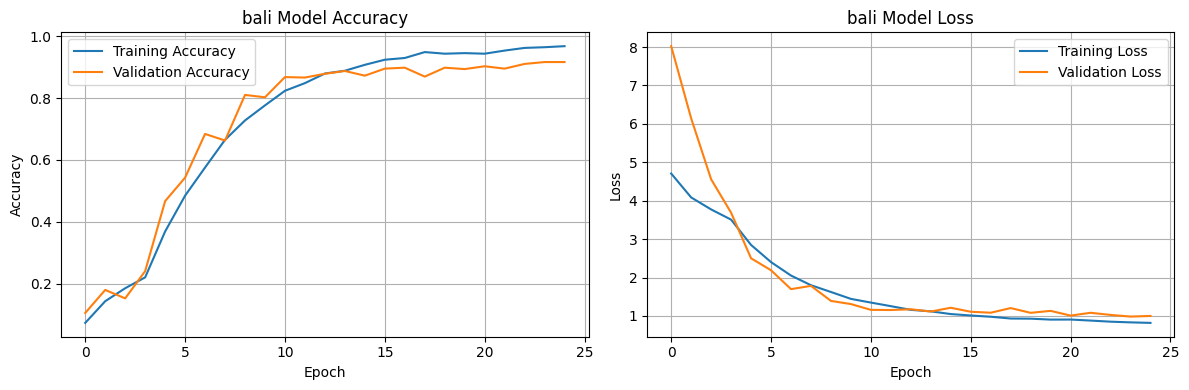

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
bali Accuracy: 91.64%
Classification Report:
              precision    recall  f1-score   support

     ba-bali       1.00      0.95      0.97        38
     ca-bali       1.00      0.97      0.99        38
     da-bali       0.95      1.00      0.97        37
     ga-bali       0.71      1.00      0.83        34
     ha-bali       0.84      0.74      0.79        35
     ja-bali       0.95      0.61      0.74        33
     ka-bali       1.00      0.95      0.97        37
     la-bali       0.94      0.81      0.87        37
     ma-bali       0.97      0.91      0.94        3

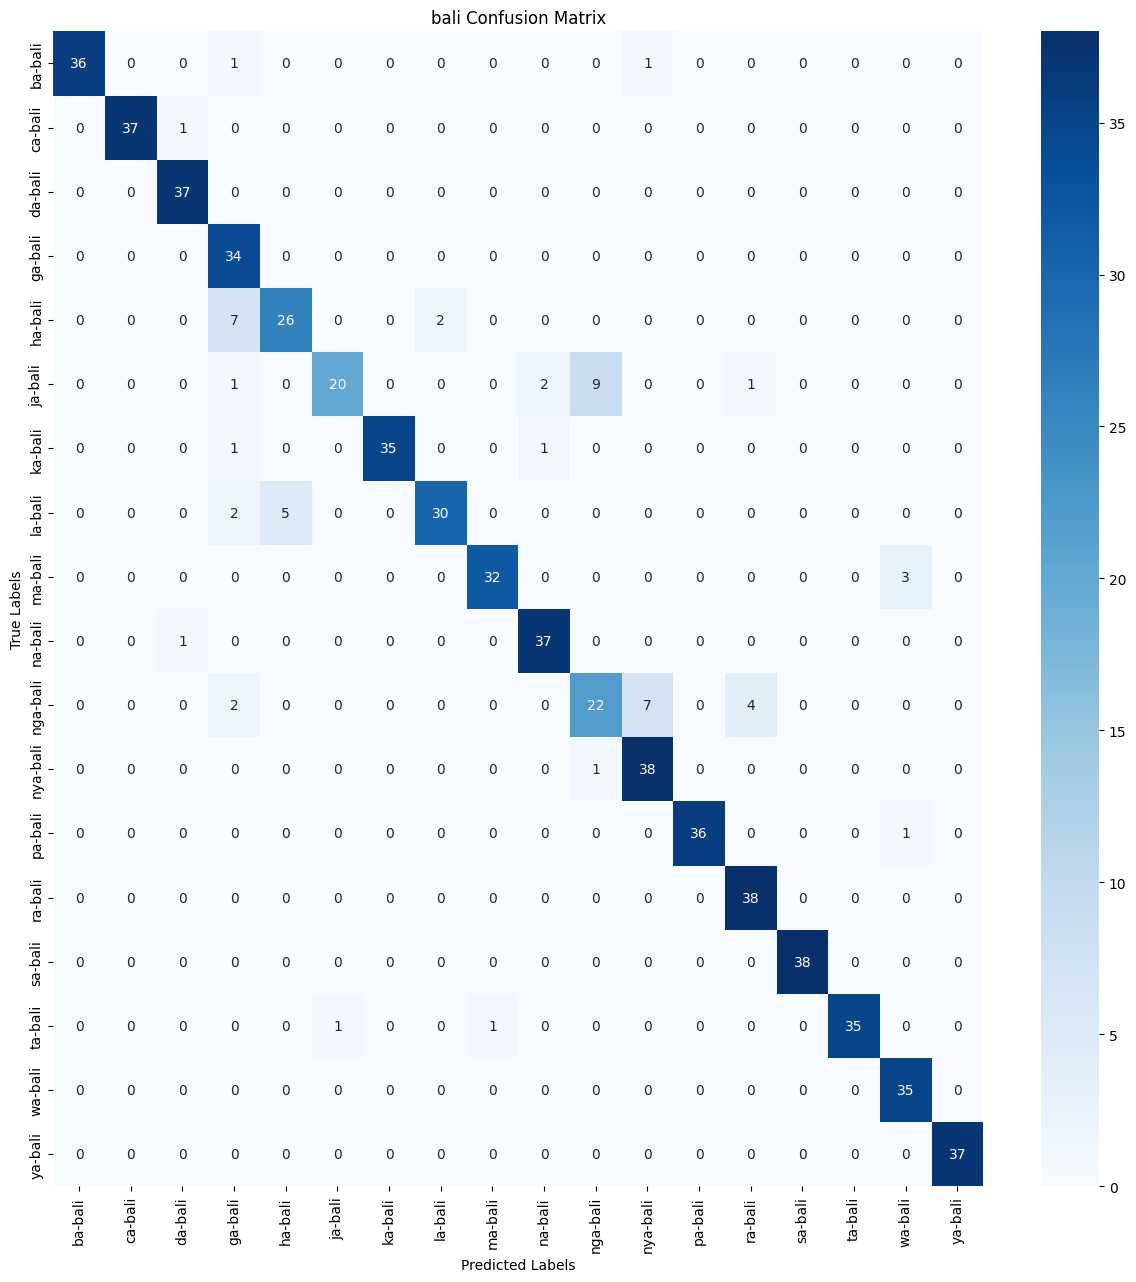

Training time: 793.75 seconds

TRAINING JAWA SCRIPT CLASSIFICATION MODEL

Found 3104 images belonging to 20 classes.
Found 764 images belonging to 20 classes.
Number of jawa classes: 20
Class mapping: {'ba-jawa': 0, 'ca-jawa': 1, 'da-jawa': 2, 'dha-jawa': 3, 'ga-jawa': 4, 'ha-jawa': 5, 'ja-jawa': 6, 'ka-jawa': 7, 'la-jawa': 8, 'ma-jawa': 9, 'na-jawa': 10, 'nga-jawa': 11, 'nya-jawa': 12, 'pa-jawa': 13, 'ra-jawa': 14, 'sa-jawa': 15, 'ta-jawa': 16, 'tha-jawa': 17, 'wa-jawa': 18, 'ya-jawa': 19}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.0706 - loss: 4.8863
Epoch 1: val_accuracy improved from -inf to 0.11780, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 862ms/step - accuracy: 0.0711 - loss: 4.8814 - val_accuracy: 0.1178 - val_loss: 6.2701 - learning_rate: 1.0000e-04
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.1582 - loss: 3.9176
Epoch 2: val_accuracy improved from 0.11780 to 0.14005, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 714ms/step - accuracy: 0.1590 - loss: 3.9130 - val_accuracy: 0.1401 - val_loss: 5.5491 - learning_rate: 1.0000e-04
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.3065 - loss: 3.1085
Epoch 3: val_accuracy improved from 0.14005 to 0.30628, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 717ms/step - accuracy: 0.3072 - loss: 3.1051 - val_accuracy: 0.3063 - val_loss: 3.9439 - learning_rate: 1.0000e-04
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.4632 - loss: 2.5535
Epoch 4: val_accuracy improved from 0.30628 to 0.62042, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 723ms/step - accuracy: 0.4638 - loss: 2.5507 - val_accuracy: 0.6204 - val_loss: 1.9040 - learning_rate: 1.0000e-04
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.5946 - loss: 2.0248
Epoch 5: val_accuracy improved from 0.62042 to 0.73168, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 714ms/step - accuracy: 0.5950 - loss: 2.0227 - val_accuracy: 0.7317 - val_loss: 1.5205 - learning_rate: 1.0000e-04
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.6931 - loss: 1.7044
Epoch 6: val_accuracy improved from 0.73168 to 0.77356, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 718ms/step - accuracy: 0.6935 - loss: 1.7030 - val_accuracy: 0.7736 - val_loss: 1.3999 - learning_rate: 1.0000e-04
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.7568 - loss: 1.5114
Epoch 7: val_accuracy improved from 0.77356 to 0.84162, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 719ms/step - accuracy: 0.7569 - loss: 1.5107 - val_accuracy: 0.8416 - val_loss: 1.2016 - learning_rate: 1.0000e-04
Epoch 8/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.8025 - loss: 1.3451
Epoch 8: val_accuracy did not improve from 0.84162
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 705ms/step - accuracy: 0.8026 - loss: 1.3448 - val_accuracy: 0.8141 - val_loss: 1.2569 - learning_rate: 1.0000e-04
Epoch 9/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.8134 - loss: 1.3087
Epoch 9: val_accuracy improved from 0.84162 to 0.85995, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 716ms/step - accuracy: 0.8137 - loss: 1.3083 - val_accuracy: 0.8599 - val_loss: 1.1227 - learning_rate: 1.0000e-04
Epoch 10/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.8364 - loss: 1.2034
Epoch 10: val_accuracy improved from 0.85995 to 0.90183, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 719ms/step - accuracy: 0.8363 - loss: 1.2036 - val_accuracy: 0.9018 - val_loss: 1.0072 - learning_rate: 1.0000e-04
Epoch 11/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.8584 - loss: 1.1664
Epoch 11: val_accuracy did not improve from 0.90183
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 711ms/step - accuracy: 0.8584 - loss: 1.1662 - val_accuracy: 0.8691 - val_loss: 1.0783 - learning_rate: 1.0000e-04
Epoch 12/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.8650 - loss: 1.1179
Epoch 12: val_accuracy did not improve from 0.90183
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 707ms/step - accuracy: 0.8650 - loss: 1.1181 - val_accuracy: 0.8901 - val_loss: 0.9952 - learning_rate: 1.0000e-04
Epoch 13/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.8660 - loss: 1.1245
Epoch 13: val_accuracy did not improve from 0.90183
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 704ms/step - accuracy: 0.8660 - loss: 1.1241 - val_accuracy: 0.8953 - val_loss: 1.0048 - learning_rate: 1.0000e-04

49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 711ms/step - accuracy: 0.8964 - loss: 1.0169 - val_accuracy: 0.9084 - val_loss: 0.9307 - learning_rate: 1.0000e-04
Epoch 16/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.8982 - loss: 0.9886
Epoch 16: val_accuracy improved from 0.90838 to 0.91099, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 711ms/step - accuracy: 0.8981 - loss: 0.9886 - val_accuracy: 0.9110 - val_loss: 0.9285 - learning_rate: 1.0000e-04
Epoch 17/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9053 - loss: 0.9624
Epoch 17: val_accuracy improved from 0.91099 to 0.91885, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 711ms/step - accuracy: 0.9054 - loss: 0.9622 - val_accuracy: 0.9188 - val_loss: 0.8853 - learning_rate: 1.0000e-04
Epoch 18/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9134 - loss: 0.9435
Epoch 18: val_accuracy did not improve from 0.91885
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 703ms/step - accuracy: 0.9135 - loss: 0.9433 - val_accuracy: 0.9188 - val_loss: 0.8955 - learning_rate: 1.0000e-04
Epoch 19/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9156 - loss: 0.9296
Epoch 19: val_accuracy did not improve from 0.91885
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 702ms/step - accuracy: 0.9156 - loss: 0.9294 - val_accuracy: 0.9110 - val_loss: 0.9292 - learning_rate: 1.0000e-04
Epoch 20/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9205 - loss: 0.8971
Epoch 20: val_accuracy improved from 0.91885 to 0.92670, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 709ms/step - accuracy: 0.9205 - loss: 0.8972 - val_accuracy: 0.9267 - val_loss: 0.8476 - learning_rate: 1.0000e-04
Epoch 21/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9300 - loss: 0.8803
Epoch 21: val_accuracy improved from 0.92670 to 0.93063, saving model to models/best_jawa_model.h5


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 710ms/step - accuracy: 0.9299 - loss: 0.8802 - val_accuracy: 0.9306 - val_loss: 0.8464 - learning_rate: 1.0000e-04
Epoch 22/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9274 - loss: 0.8733
Epoch 22: val_accuracy did not improve from 0.93063
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 703ms/step - accuracy: 0.9274 - loss: 0.8732 - val_accuracy: 0.9058 - val_loss: 0.9342 - learning_rate: 1.0000e-04
Epoch 23/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9152 - loss: 0.9003
Epoch 23: val_accuracy did not improve from 0.93063
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 702ms/step - accuracy: 0.9153 - loss: 0.8999 - val_accuracy: 0.9215 - val_loss: 0.8332 - learning_rate: 1.0000e-04
Epoch 24/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9306 - loss: 0.8655
Epoch 24: val_accuracy did not improve from 0.93063
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 703ms/step - accuracy: 0.9305 - loss: 0.8655 - val_accuracy: 0.9202 - val_loss: 0.8632 - learning_rate: 1.0000e-04

49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 710ms/step - accuracy: 0.9239 - loss: 0.8498 - val_accuracy: 0.9319 - val_loss: 0.8110 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 25.


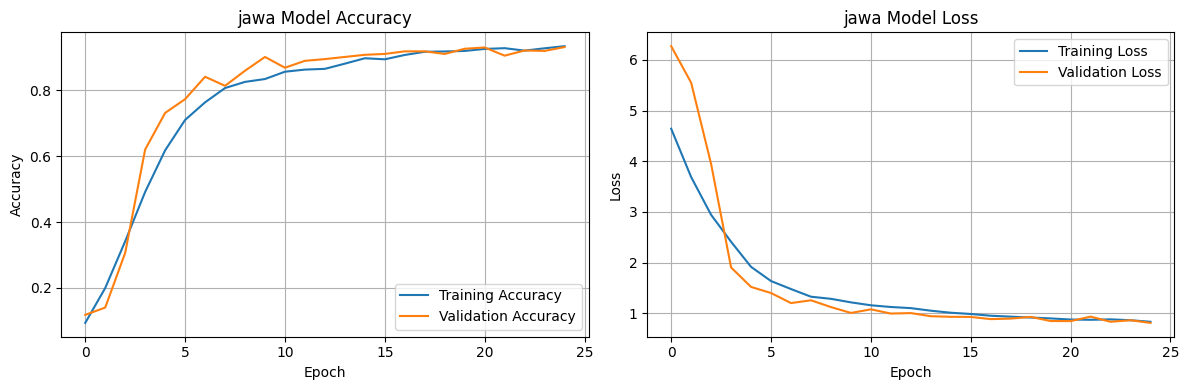

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
jawa Accuracy: 93.19%
Classification Report:
              precision    recall  f1-score   support

     ba-jawa       1.00      0.97      0.99        40
     ca-jawa       0.93      0.97      0.95        40
     da-jawa       0.83      0.71      0.76        41
    dha-jawa       1.00      0.98      0.99        42
     ga-jawa       0.95      0.98      0.96        42
     ha-jawa       0.75      0.59      0.66        41
     ja-jawa       1.00      1.00      1.00        41
     ka-jawa       0.97      1.00      0.99        39
     la-jawa  

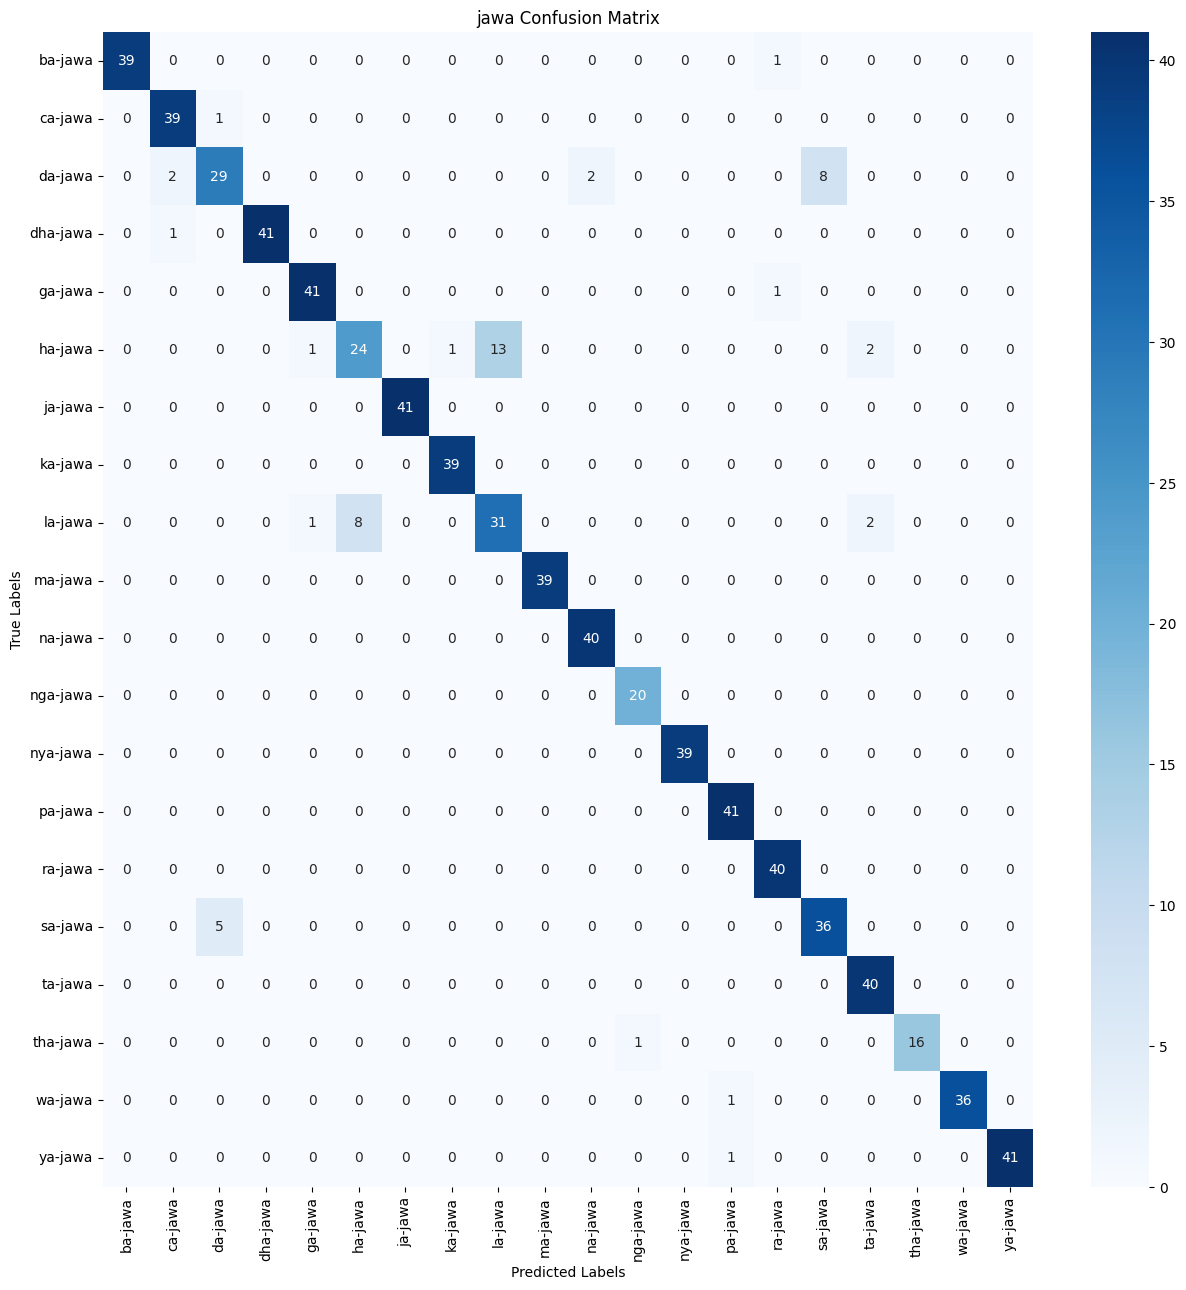

Training time: 897.33 seconds

TRAINING SUNDA SCRIPT CLASSIFICATION MODEL

Found 4168 images belonging to 25 classes.
Found 1028 images belonging to 25 classes.
Number of sunda classes: 25
Class mapping: {'ba-sunda': 0, 'ca-sunda': 1, 'da-sunda': 2, 'fa-sunda': 3, 'ga-sunda': 4, 'ha-sunda': 5, 'ja-sunda': 6, 'ka-sunda': 7, 'kha-sunda': 8, 'la-sunda': 9, 'ma-sunda': 10, 'na-sunda': 11, 'nga-sunda': 12, 'nya-sunda': 13, 'pa-sunda': 14, 'qa-sunda': 15, 'ra-sunda': 16, 'sa-sunda': 17, 'sya-sunda': 18, 'ta-sunda': 19, 'va-sunda': 20, 'wa-sunda': 21, 'xa-sunda': 22, 'ya-sunda': 23, 'za-sunda': 24}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.0773 - loss: 4.9702
Epoch 1: val_accuracy improved from -inf to 0.14689, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 60s 802ms/step - accuracy: 0.0784 - loss: 4.9601 - val_accuracy: 0.1469 - val_loss: 6.7706 - learning_rate: 1.0000e-04
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.3483 - loss: 3.0500
Epoch 2: val_accuracy improved from 0.14689 to 0.43677, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 695ms/step - accuracy: 0.3494 - loss: 3.0459 - val_accuracy: 0.4368 - val_loss: 2.7872 - learning_rate: 1.0000e-04
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.5678 - loss: 2.2729
Epoch 3: val_accuracy improved from 0.43677 to 0.68482, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 696ms/step - accuracy: 0.5681 - loss: 2.2722 - val_accuracy: 0.6848 - val_loss: 1.7931 - learning_rate: 1.0000e-04
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.7298 - loss: 1.7096
Epoch 4: val_accuracy improved from 0.68482 to 0.85798, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 696ms/step - accuracy: 0.7302 - loss: 1.7084 - val_accuracy: 0.8580 - val_loss: 1.2569 - learning_rate: 1.0000e-04
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.8244 - loss: 1.4040
Epoch 5: val_accuracy improved from 0.85798 to 0.89591, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 694ms/step - accuracy: 0.8246 - loss: 1.4031 - val_accuracy: 0.8959 - val_loss: 1.1872 - learning_rate: 1.0000e-04
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.8695 - loss: 1.2400
Epoch 6: val_accuracy improved from 0.89591 to 0.94455, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 693ms/step - accuracy: 0.8696 - loss: 1.2398 - val_accuracy: 0.9446 - val_loss: 1.0284 - learning_rate: 1.0000e-04
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9093 - loss: 1.1238
Epoch 7: val_accuracy improved from 0.94455 to 0.94650, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 693ms/step - accuracy: 0.9094 - loss: 1.1233 - val_accuracy: 0.9465 - val_loss: 0.9968 - learning_rate: 1.0000e-04
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.9378 - loss: 1.0086
Epoch 8: val_accuracy improved from 0.94650 to 0.94747, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 692ms/step - accuracy: 0.9379 - loss: 1.0085 - val_accuracy: 0.9475 - val_loss: 0.9558 - learning_rate: 1.0000e-04
Epoch 9/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9495 - loss: 0.9553
Epoch 9: val_accuracy improved from 0.94747 to 0.96206, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 694ms/step - accuracy: 0.9494 - loss: 0.9553 - val_accuracy: 0.9621 - val_loss: 0.9124 - learning_rate: 1.0000e-04
Epoch 10/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9599 - loss: 0.9119
Epoch 10: val_accuracy did not improve from 0.96206
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 688ms/step - accuracy: 0.9599 - loss: 0.9119 - val_accuracy: 0.9572 - val_loss: 0.8876 - learning_rate: 1.0000e-04
Epoch 11/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9633 - loss: 0.9003
Epoch 11: val_accuracy improved from 0.96206 to 0.96887, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 693ms/step - accuracy: 0.9633 - loss: 0.9002 - val_accuracy: 0.9689 - val_loss: 0.8717 - learning_rate: 1.0000e-04
Epoch 12/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9693 - loss: 0.8483
Epoch 12: val_accuracy improved from 0.96887 to 0.97082, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 694ms/step - accuracy: 0.9694 - loss: 0.8482 - val_accuracy: 0.9708 - val_loss: 0.8522 - learning_rate: 1.0000e-04
Epoch 13/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9751 - loss: 0.8320
Epoch 13: val_accuracy improved from 0.97082 to 0.97179, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 695ms/step - accuracy: 0.9751 - loss: 0.8319 - val_accuracy: 0.9718 - val_loss: 0.8274 - learning_rate: 1.0000e-04
Epoch 14/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9770 - loss: 0.8063
Epoch 14: val_accuracy improved from 0.97179 to 0.97763, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 695ms/step - accuracy: 0.9770 - loss: 0.8063 - val_accuracy: 0.9776 - val_loss: 0.8165 - learning_rate: 1.0000e-04
Epoch 15/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9774 - loss: 0.8015
Epoch 15: val_accuracy did not improve from 0.97763
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 688ms/step - accuracy: 0.9774 - loss: 0.8014 - val_accuracy: 0.7889 - val_loss: 1.2362 - learning_rate: 1.0000e-04
Epoch 16/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9563 - loss: 0.8613
Epoch 16: val_accuracy did not improve from 0.97763
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 687ms/step - accuracy: 0.9565 - loss: 0.8607 - val_accuracy: 0.9669 - val_loss: 0.8111 - learning_rate: 1.0000e-04
Epoch 17/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9786 - loss: 0.7747
Epoch 17: val_accuracy did not improve from 0.97763
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 688ms/step - accuracy: 0.9787 - loss: 0.7746 - val_accuracy: 0.9728 - val_loss: 0.7895 - learning_rate: 1.0000e-04

66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 692ms/step - accuracy: 0.9868 - loss: 0.7436 - val_accuracy: 0.9815 - val_loss: 0.7819 - learning_rate: 1.0000e-04
Epoch 19/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9866 - loss: 0.7269
Epoch 19: val_accuracy improved from 0.98152 to 0.98346, saving model to models/best_sunda_model.h5


66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 694ms/step - accuracy: 0.9866 - loss: 0.7268 - val_accuracy: 0.9835 - val_loss: 0.7568 - learning_rate: 1.0000e-04
Epoch 20/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.9876 - loss: 0.7193
Epoch 20: val_accuracy did not improve from 0.98346
66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 691ms/step - accuracy: 0.9876 - loss: 0.7193 - val_accuracy: 0.9835 - val_loss: 0.7413 - learning_rate: 1.0000e-04
Epoch 21/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.9863 - loss: 0.7152
Epoch 21: val_accuracy did not improve from 0.98346
66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 692ms/step - accuracy: 0.9863 - loss: 0.7153 - val_accuracy: 0.9621 - val_loss: 0.7908 - learning_rate: 1.0000e-04
Epoch 22/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.9891 - loss: 0.6969
Epoch 22: val_accuracy did not improve from 0.98346
66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 694ms/step - accuracy: 0.9891 - loss: 0.6969 - val_accuracy: 0.9796 - val_loss: 0.7377 - learning_rate: 1.0000e-04

66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 693ms/step - accuracy: 0.9891 - loss: 0.6904 - val_accuracy: 0.9844 - val_loss: 0.7360 - learning_rate: 1.0000e-04
Epoch 24/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9900 - loss: 0.6833
Epoch 24: val_accuracy did not improve from 0.98444
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 689ms/step - accuracy: 0.9900 - loss: 0.6832 - val_accuracy: 0.9786 - val_loss: 0.7386 - learning_rate: 1.0000e-04
Epoch 25/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9924 - loss: 0.6716
Epoch 25: val_accuracy did not improve from 0.98444
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 689ms/step - accuracy: 0.9923 - loss: 0.6718 - val_accuracy: 0.9251 - val_loss: 0.8741 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 23.


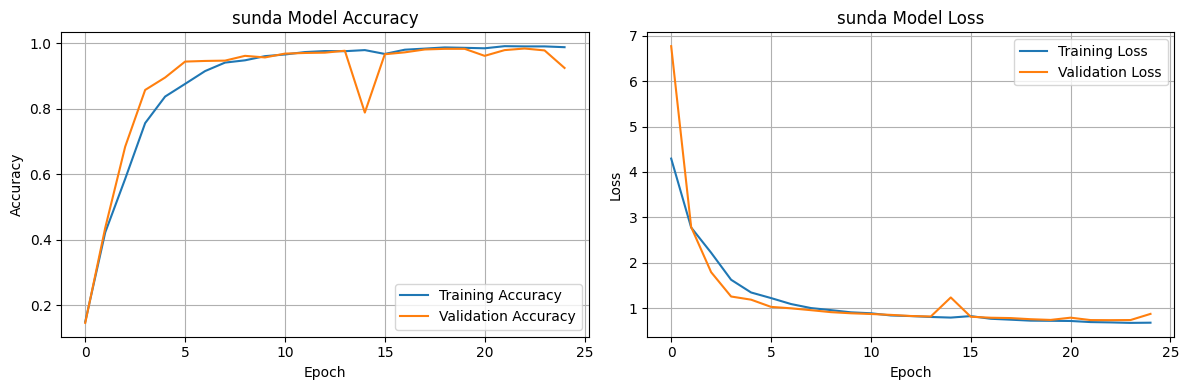

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
sunda Accuracy: 98.44%
Classification Report:
              precision    recall  f1-score   support

    ba-sunda       1.00      0.95      0.97        41
    ca-sunda       1.00      1.00      1.00        43
    da-sunda       1.00      1.00      1.00        40
    fa-sunda       0.97      0.79      0.87        42
    ga-sunda       0.98      1.00      

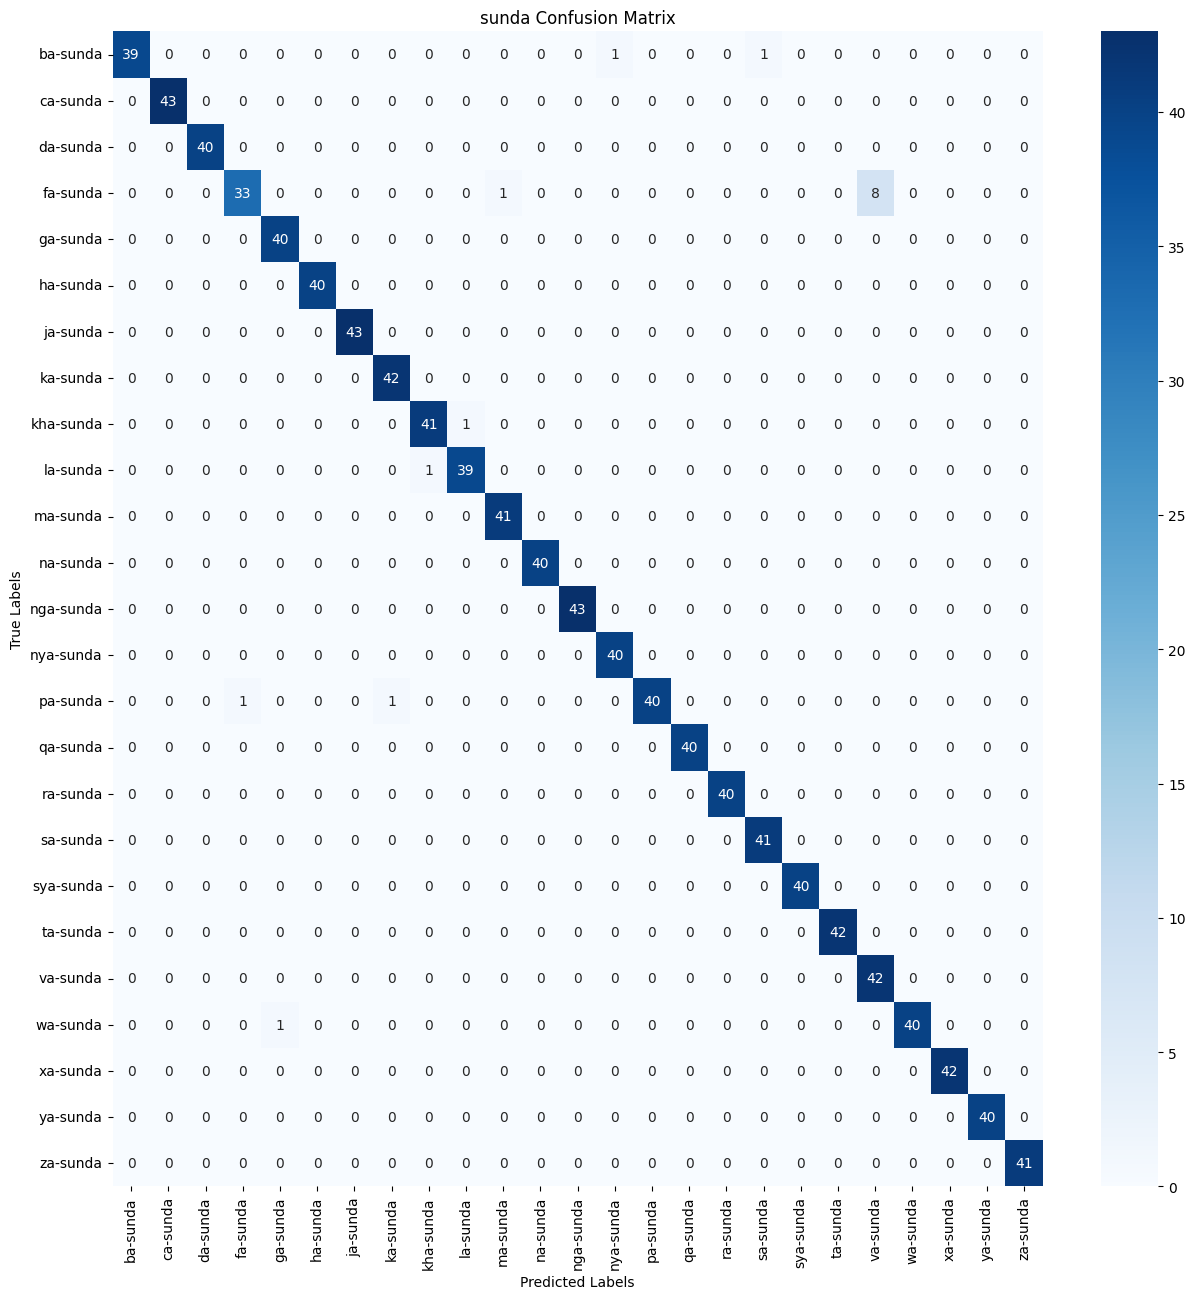

Training time: 1169.44 seconds

2. Training combined two-script models...

TRAINING BALI + JAWA COMBINED MODEL

Found 2668 images belonging to 18 classes.
Found 658 images belonging to 18 classes.
Found 3104 images belonging to 20 classes.
Found 764 images belonging to 20 classes.
bali classes: 18
jawa classes: 20
Total combined classes: 38
Epoch 1/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0484 - loss: 5.2788
Epoch 1: val_accuracy improved from -inf to 0.19101, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.0487 - loss: 5.2739 - val_accuracy: 0.1910 - val_loss: 3.9946 - learning_rate: 1.0000e-04
Epoch 2/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2213 - loss: 3.6162
Epoch 2: val_accuracy improved from 0.19101 to 0.52180, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.2221 - loss: 3.6125 - val_accuracy: 0.5218 - val_loss: 2.3621 - learning_rate: 1.0000e-04
Epoch 3/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5006 - loss: 2.4211
Epoch 3: val_accuracy improved from 0.52180 to 0.79600, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.5012 - loss: 2.4188 - val_accuracy: 0.7960 - val_loss: 1.4988 - learning_rate: 1.0000e-04
Epoch 4/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6960 - loss: 1.8029
Epoch 4: val_accuracy improved from 0.79600 to 0.81215, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6963 - loss: 1.8016 - val_accuracy: 0.8121 - val_loss: 1.3396 - learning_rate: 1.0000e-04
Epoch 5/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7845 - loss: 1.4865
Epoch 5: val_accuracy improved from 0.81215 to 0.88764, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7847 - loss: 1.4858 - val_accuracy: 0.8876 - val_loss: 1.1431 - learning_rate: 1.0000e-04
Epoch 6/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8432 - loss: 1.2818
Epoch 6: val_accuracy did not improve from 0.88764
91/91 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8433 - loss: 1.2814 - val_accuracy: 0.8713 - val_loss: 1.1366 - learning_rate: 1.0000e-04
Epoch 7/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8747 - loss: 1.1603
Epoch 7: val_accuracy improved from 0.88764 to 0.89642, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8748 - loss: 1.1600 - val_accuracy: 0.8964 - val_loss: 1.0483 - learning_rate: 1.0000e-04
Epoch 8/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8989 - loss: 1.0771
Epoch 8: val_accuracy did not improve from 0.89642
91/91 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8990 - loss: 1.0769 - val_accuracy: 0.8812 - val_loss: 1.0584 - learning_rate: 1.0000e-04
Epoch 9/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9172 - loss: 1.0132
Epoch 9: val_accuracy improved from 0.89642 to 0.91245, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9172 - loss: 1.0131 - val_accuracy: 0.9124 - val_loss: 0.9809 - learning_rate: 1.0000e-04
Epoch 10/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9282 - loss: 0.9676
Epoch 10: val_accuracy did not improve from 0.91245
91/91 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9282 - loss: 0.9674 - val_accuracy: 0.9012 - val_loss: 0.9868 - learning_rate: 1.0000e-04
Epoch 11/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9197 - loss: 0.9557
Epoch 11: val_accuracy improved from 0.91245 to 0.91842, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9198 - loss: 0.9555 - val_accuracy: 0.9184 - val_loss: 0.9576 - learning_rate: 1.0000e-04
Epoch 12/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9371 - loss: 0.8955
Epoch 12: val_accuracy improved from 0.91842 to 0.93179, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9371 - loss: 0.8954 - val_accuracy: 0.9318 - val_loss: 0.8980 - learning_rate: 1.0000e-04
Epoch 13/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9398 - loss: 0.8695
Epoch 13: val_accuracy improved from 0.93179 to 0.93987, saving model to models/best_bali_jawa_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9398 - loss: 0.8694 - val_accuracy: 0.9399 - val_loss: 0.8844 - learning_rate: 1.0000e-04
Epoch 14/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9489 - loss: 0.8318
Epoch 14: val_accuracy did not improve from 0.93987
91/91 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9489 - loss: 0.8318 - val_accuracy: 0.9276 - val_loss: 0.8983 - learning_rate: 1.0000e-04
Epoch 15/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9534 - loss: 0.8154
Epoch 15: val_accuracy did not improve from 0.93987
91/91 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9533 - loss: 0.8154 - val_accuracy: 0.9244 - val_loss: 0.9349 - learning_rate: 1.0000e-04
Epoch 16/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9529 - loss: 0.8017
Epoch 16: val_accuracy did not improve from 0.93987

Epoch 16: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
91/91 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9529 - loss: 0.8016 - val_a

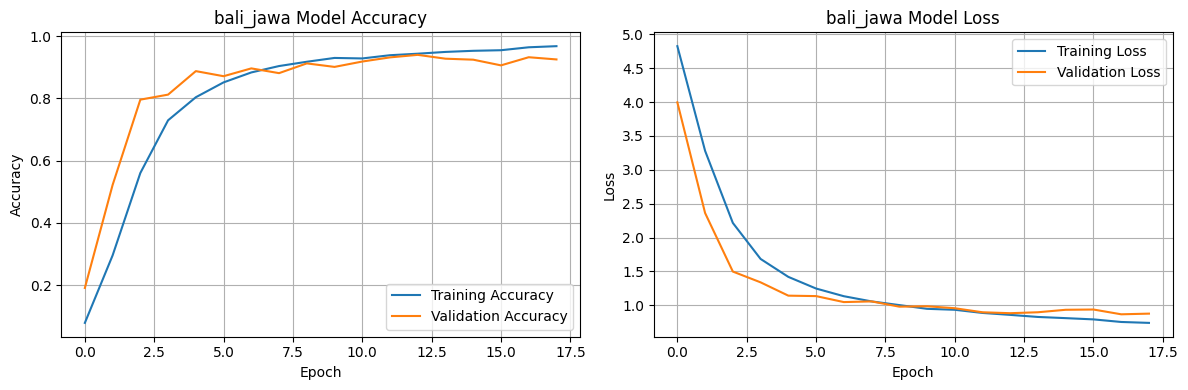

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 674ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 796ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
bali_jawa Accuracy: 93.42%
Classification Report:
               precision    recall  f1-score   support

 bali_ba-bali     

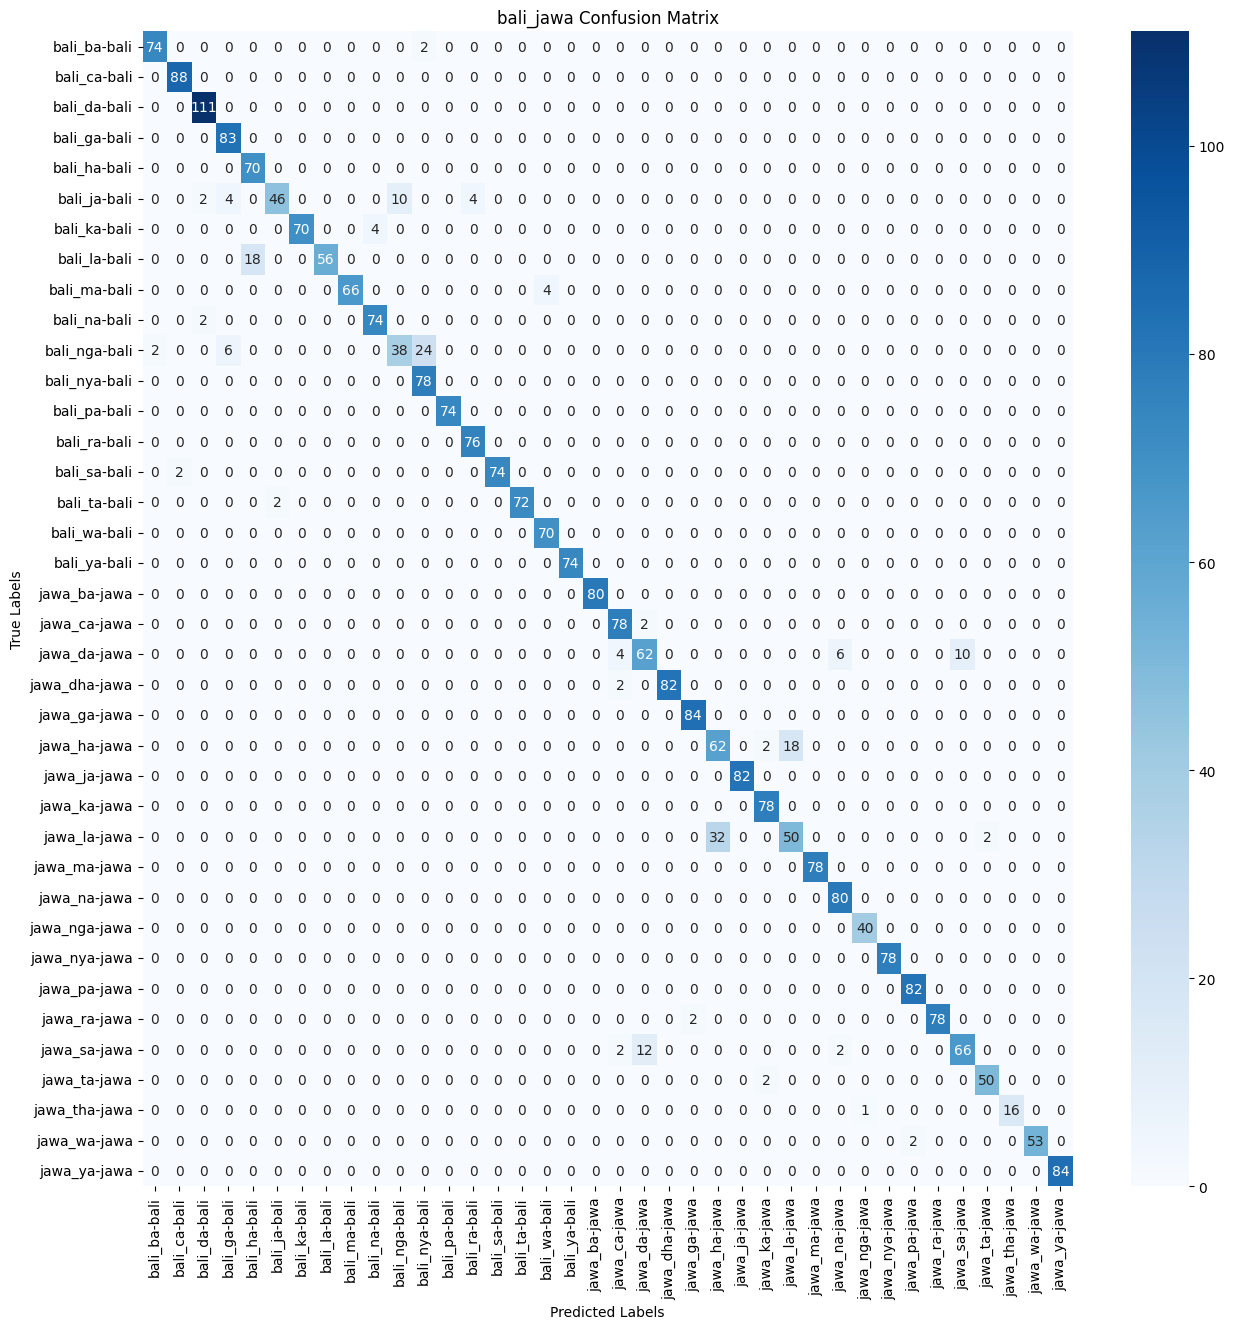

Training time: 2349.99 seconds

TRAINING BALI + SUNDA COMBINED MODEL

Found 2668 images belonging to 18 classes.
Found 658 images belonging to 18 classes.
Found 4168 images belonging to 25 classes.
Found 1028 images belonging to 25 classes.
bali classes: 18
sunda classes: 25
Total combined classes: 43
Epoch 1/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0766 - loss: 5.1398
Epoch 1: val_accuracy improved from -inf to 0.42628, saving model to models/best_bali_sunda_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.0773 - loss: 5.1333 - val_accuracy: 0.4263 - val_loss: 2.7636 - learning_rate: 1.0000e-04
Epoch 2/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4353 - loss: 2.8089
Epoch 2: val_accuracy improved from 0.42628 to 0.73718, saving model to models/best_bali_sunda_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.4360 - loss: 2.8062 - val_accuracy: 0.7372 - val_loss: 1.6978 - learning_rate: 1.0000e-04
Epoch 3/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6931 - loss: 1.8519
Epoch 3: val_accuracy improved from 0.73718 to 0.89507, saving model to models/best_bali_sunda_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.6935 - loss: 1.8508 - val_accuracy: 0.8951 - val_loss: 1.2293 - learning_rate: 1.0000e-04
Epoch 4/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8312 - loss: 1.4071
Epoch 4: val_accuracy improved from 0.89507 to 0.91404, saving model to models/best_bali_sunda_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8314 - loss: 1.4065 - val_accuracy: 0.9140 - val_loss: 1.1089 - learning_rate: 1.0000e-04
Epoch 5/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8943 - loss: 1.1880
Epoch 5: val_accuracy improved from 0.91404 to 0.93119, saving model to models/best_bali_sunda_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8944 - loss: 1.1876 - val_accuracy: 0.9312 - val_loss: 1.0484 - learning_rate: 1.0000e-04
Epoch 6/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9312 - loss: 1.0520
Epoch 6: val_accuracy improved from 0.93119 to 0.93772, saving model to models/best_bali_sunda_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.9313 - loss: 1.0517 - val_accuracy: 0.9377 - val_loss: 1.0033 - learning_rate: 1.0000e-04
Epoch 7/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9461 - loss: 0.9746
Epoch 7: val_accuracy did not improve from 0.93772
108/108 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.9462 - loss: 0.9744 - val_accuracy: 0.9350 - val_loss: 0.9577 - learning_rate: 1.0000e-04
Epoch 8/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9621 - loss: 0.9055
Epoch 8: val_accuracy improved from 0.93772 to 0.96131, saving model to models/best_bali_sunda_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9621 - loss: 0.9053 - val_accuracy: 0.9613 - val_loss: 0.8787 - learning_rate: 1.0000e-04
Epoch 9/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9718 - loss: 0.8593
Epoch 9: val_accuracy did not improve from 0.96131
108/108 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9718 - loss: 0.8592 - val_accuracy: 0.9523 - val_loss: 0.8955 - learning_rate: 1.0000e-04
Epoch 10/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9756 - loss: 0.8256
Epoch 10: val_accuracy did not improve from 0.96131
108/108 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9757 - loss: 0.8255 - val_accuracy: 0.9557 - val_loss: 0.8767 - learning_rate: 1.0000e-04
Epoch 11/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9798 - loss: 0.7943
Epoch 11: val_accuracy did not improve from 0.96131
108/108 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9798 - loss: 0.7942 - val_accuracy: 0.9467 - val_loss: 0.9331 - learning_rate: 1.0000e-04
Epoc

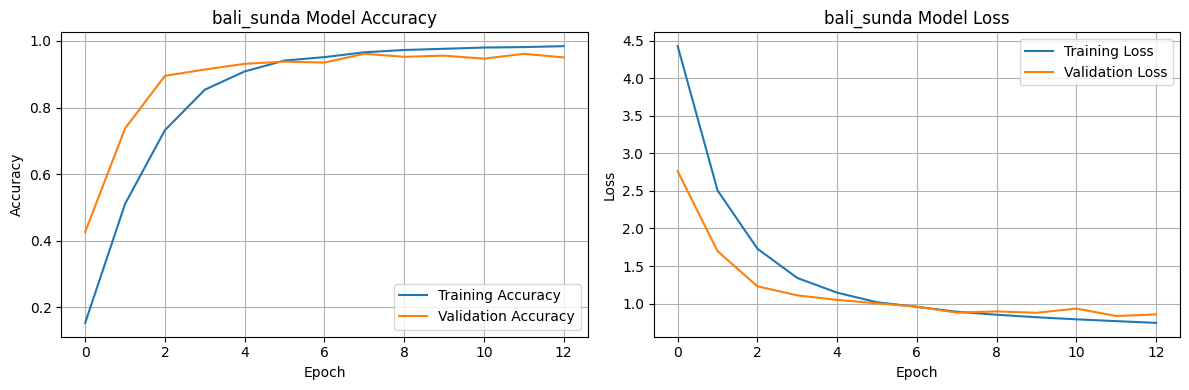

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 976ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 943ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━

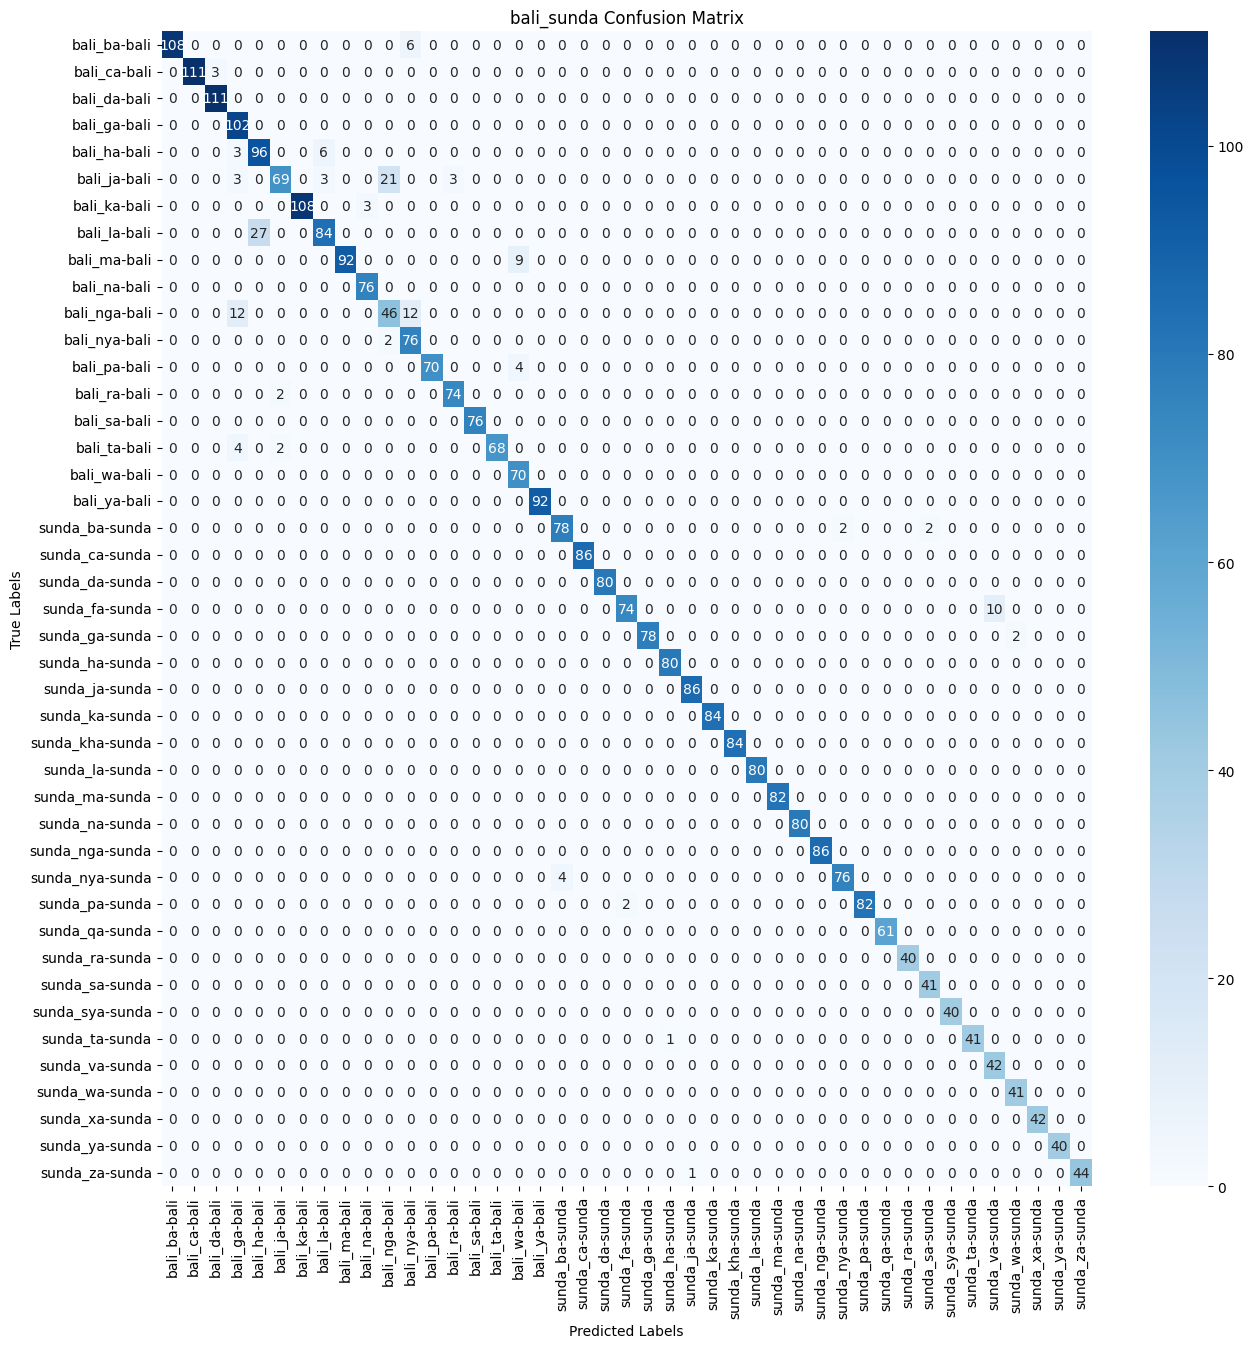

Training time: 2004.55 seconds

TRAINING JAWA + SUNDA COMBINED MODEL

Found 3104 images belonging to 20 classes.
Found 764 images belonging to 20 classes.
Found 4168 images belonging to 25 classes.
Found 1028 images belonging to 25 classes.
jawa classes: 20
sunda classes: 25
Total combined classes: 45
Epoch 1/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0791 - loss: 5.1373
Epoch 1: val_accuracy improved from -inf to 0.37184, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.0799 - loss: 5.1307 - val_accuracy: 0.3718 - val_loss: 2.8671 - learning_rate: 1.0000e-04
Epoch 2/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4809 - loss: 2.6267
Epoch 2: val_accuracy improved from 0.37184 to 0.81943, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.4817 - loss: 2.6240 - val_accuracy: 0.8194 - val_loss: 1.4917 - learning_rate: 1.0000e-04
Epoch 3/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7578 - loss: 1.6652
Epoch 3: val_accuracy improved from 0.81943 to 0.88281, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7581 - loss: 1.6643 - val_accuracy: 0.8828 - val_loss: 1.2094 - learning_rate: 1.0000e-04
Epoch 4/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8571 - loss: 1.3004
Epoch 4: val_accuracy improved from 0.88281 to 0.89860, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8572 - loss: 1.2999 - val_accuracy: 0.8986 - val_loss: 1.1268 - learning_rate: 1.0000e-04
Epoch 5/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8965 - loss: 1.1317
Epoch 5: val_accuracy improved from 0.89860 to 0.91658, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.8966 - loss: 1.1314 - val_accuracy: 0.9166 - val_loss: 0.9792 - learning_rate: 1.0000e-04
Epoch 6/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9230 - loss: 1.0231
Epoch 6: val_accuracy improved from 0.91658 to 0.93049, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9230 - loss: 1.0229 - val_accuracy: 0.9305 - val_loss: 0.9192 - learning_rate: 1.0000e-04
Epoch 7/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9358 - loss: 0.9543
Epoch 7: val_accuracy did not improve from 0.93049
115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9359 - loss: 0.9542 - val_accuracy: 0.9141 - val_loss: 0.9465 - learning_rate: 1.0000e-04
Epoch 8/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9400 - loss: 0.9157
Epoch 8: val_accuracy improved from 0.93049 to 0.93464, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9400 - loss: 0.9156 - val_accuracy: 0.9346 - val_loss: 0.8844 - learning_rate: 1.0000e-04
Epoch 9/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9516 - loss: 0.8672
Epoch 9: val_accuracy improved from 0.93464 to 0.93908, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9517 - loss: 0.8671 - val_accuracy: 0.9391 - val_loss: 0.8453 - learning_rate: 1.0000e-04
Epoch 10/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9532 - loss: 0.8362
Epoch 10: val_accuracy improved from 0.93908 to 0.94503, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.9532 - loss: 0.8361 - val_accuracy: 0.9450 - val_loss: 0.8324 - learning_rate: 1.0000e-04
Epoch 11/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9625 - loss: 0.7994
Epoch 11: val_accuracy improved from 0.94503 to 0.95368, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9625 - loss: 0.7994 - val_accuracy: 0.9537 - val_loss: 0.8010 - learning_rate: 1.0000e-04
Epoch 12/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9613 - loss: 0.7754
Epoch 12: val_accuracy did not improve from 0.95368
115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9613 - loss: 0.7754 - val_accuracy: 0.9503 - val_loss: 0.7963 - learning_rate: 1.0000e-04
Epoch 13/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9679 - loss: 0.7460
Epoch 13: val_accuracy improved from 0.95368 to 0.95934, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9679 - loss: 0.7459 - val_accuracy: 0.9593 - val_loss: 0.7691 - learning_rate: 1.0000e-04
Epoch 14/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9700 - loss: 0.7275
Epoch 14: val_accuracy did not improve from 0.95934
115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9700 - loss: 0.7274 - val_accuracy: 0.9568 - val_loss: 0.7612 - learning_rate: 1.0000e-04
Epoch 15/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9724 - loss: 0.6976
Epoch 15: val_accuracy improved from 0.95934 to 0.96150, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9724 - loss: 0.6976 - val_accuracy: 0.9615 - val_loss: 0.7201 - learning_rate: 1.0000e-04
Epoch 16/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9751 - loss: 0.6844
Epoch 16: val_accuracy did not improve from 0.96150
115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9751 - loss: 0.6843 - val_accuracy: 0.9484 - val_loss: 0.7552 - learning_rate: 1.0000e-04
Epoch 17/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9747 - loss: 0.6690
Epoch 17: val_accuracy improved from 0.96150 to 0.96652, saving model to models/best_jawa_sunda_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9747 - loss: 0.6690 - val_accuracy: 0.9665 - val_loss: 0.6929 - learning_rate: 1.0000e-04
Epoch 18/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9796 - loss: 0.6413
Epoch 18: val_accuracy did not improve from 0.96652
115/115 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.9796 - loss: 0.6412 - val_accuracy: 0.9595 - val_loss: 0.7076 - learning_rate: 1.0000e-04
Epoch 19/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9837 - loss: 0.6105
Epoch 19: val_accuracy did not improve from 0.96652
115/115 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9837 - loss: 0.6105 - val_accuracy: 0.9635 - val_loss: 0.6700 - learning_rate: 1.0000e-04
Epoch 20/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9780 - loss: 0.6125
Epoch 20: val_accuracy did not improve from 0.96652
115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9780 - loss: 0.6125 - val_accuracy: 0.9549 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Ep

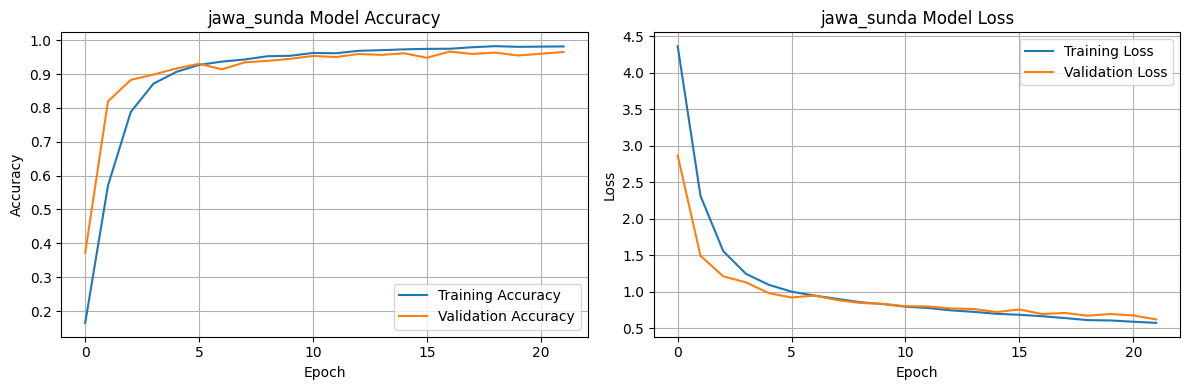

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 801ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 898ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━

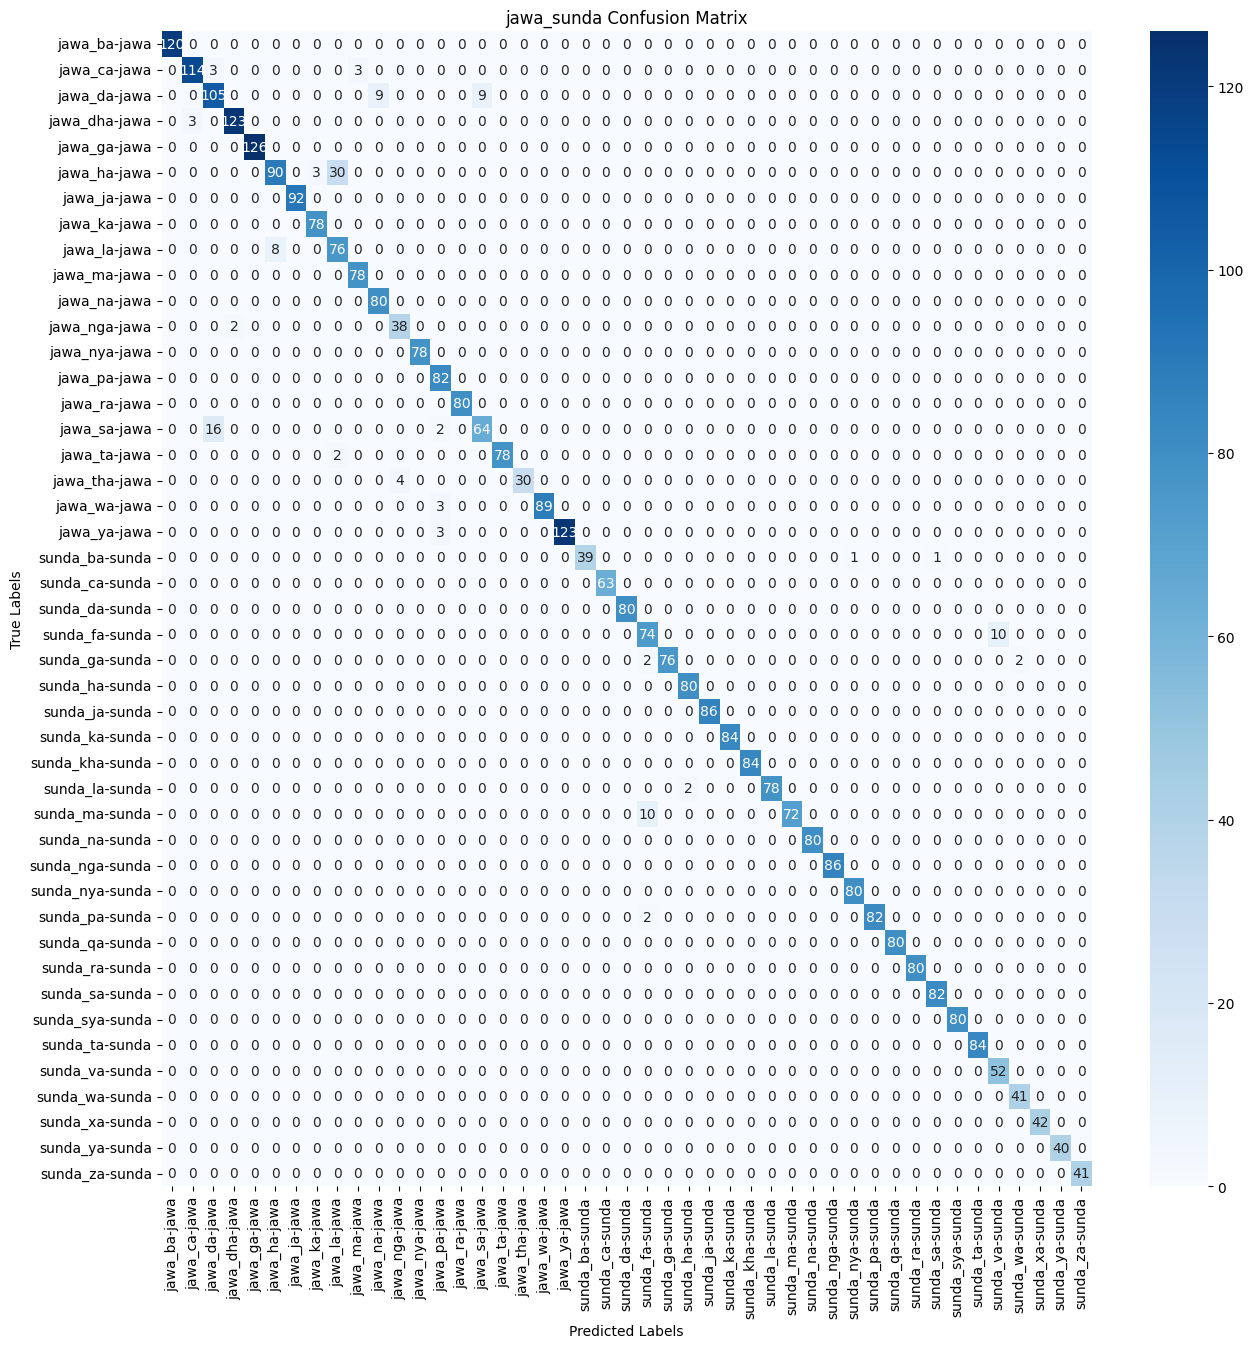

Training time: 3552.59 seconds

3. Training the combined three-script model...

TRAINING COMBINED MODEL FOR ALL THREE SCRIPTS (BALI + JAWA + SUNDA)

Found 2668 images belonging to 18 classes.
Found 658 images belonging to 18 classes.
Found 3104 images belonging to 20 classes.
Found 764 images belonging to 20 classes.
Found 4168 images belonging to 25 classes.
Found 1028 images belonging to 25 classes.
Bali classes: 18
Jawa classes: 20
Sunda classes: 25
Total combined classes: 63
Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0889 - loss: 5.2021
Epoch 1: val_accuracy improved from -inf to 0.61903, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.0896 - loss: 5.1961 - val_accuracy: 0.6190 - val_loss: 2.1925 - learning_rate: 1.0000e-04
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5598 - loss: 2.3643
Epoch 2: val_accuracy improved from 0.61903 to 0.87075, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.5604 - loss: 2.3624 - val_accuracy: 0.8707 - val_loss: 1.3460 - learning_rate: 1.0000e-04
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8100 - loss: 1.4938
Epoch 3: val_accuracy improved from 0.87075 to 0.90162, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.8102 - loss: 1.4932 - val_accuracy: 0.9016 - val_loss: 1.0926 - learning_rate: 1.0000e-04
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8941 - loss: 1.1732
Epoch 4: val_accuracy improved from 0.90162 to 0.92979, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.8941 - loss: 1.1729 - val_accuracy: 0.9298 - val_loss: 0.9769 - learning_rate: 1.0000e-04
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9272 - loss: 1.0196
Epoch 5: val_accuracy improved from 0.92979 to 0.93158, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9272 - loss: 1.0195 - val_accuracy: 0.9316 - val_loss: 0.9590 - learning_rate: 1.0000e-04
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9439 - loss: 0.9287
Epoch 6: val_accuracy improved from 0.93158 to 0.94143, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9439 - loss: 0.9286 - val_accuracy: 0.9414 - val_loss: 0.8821 - learning_rate: 1.0000e-04
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9571 - loss: 0.8580
Epoch 7: val_accuracy did not improve from 0.94143
157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9571 - loss: 0.8579 - val_accuracy: 0.9392 - val_loss: 0.8827 - learning_rate: 1.0000e-04
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9610 - loss: 0.8131
Epoch 8: val_accuracy did not improve from 0.94143
157/157 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9610 - loss: 0.8131 - val_accuracy: 0.9397 - val_loss: 0.8474 - learning_rate: 1.0000e-04
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9648 - loss: 0.7714
Epoch 9: val_accuracy improved from 0.94143 to 0.94575, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9648 - loss: 0.7713 - val_accuracy: 0.9457 - val_loss: 0.8277 - learning_rate: 1.0000e-04
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9685 - loss: 0.7375
Epoch 10: val_accuracy improved from 0.94575 to 0.95564, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9686 - loss: 0.7374 - val_accuracy: 0.9556 - val_loss: 0.7545 - learning_rate: 1.0000e-04
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9732 - loss: 0.6997
Epoch 11: val_accuracy improved from 0.95564 to 0.95924, saving model to models/best_bali_jawa_sunda_model.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9732 - loss: 0.6997 - val_accuracy: 0.9592 - val_loss: 0.7456 - learning_rate: 1.0000e-04
Epoch 12/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9784 - loss: 0.6612
Epoch 12: val_accuracy did not improve from 0.95924
157/157 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9784 - loss: 0.6612 - val_accuracy: 0.9430 - val_loss: 0.7695 - learning_rate: 1.0000e-04
Epoch 13/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9781 - loss: 0.6390
Epoch 13: val_accuracy did not improve from 0.95924
157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9781 - loss: 0.6390 - val_accuracy: 0.9578 - val_loss: 0.7083 - learning_rate: 1.0000e-04
Epoch 14/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9814 - loss: 0.6044
Epoch 14: val_accuracy did not improve from 0.95924
157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9814 - loss: 0.6044 - val_accuracy: 0.9540 - val_loss: 0.6895 - learning_rate: 1.0000e-04
Ep

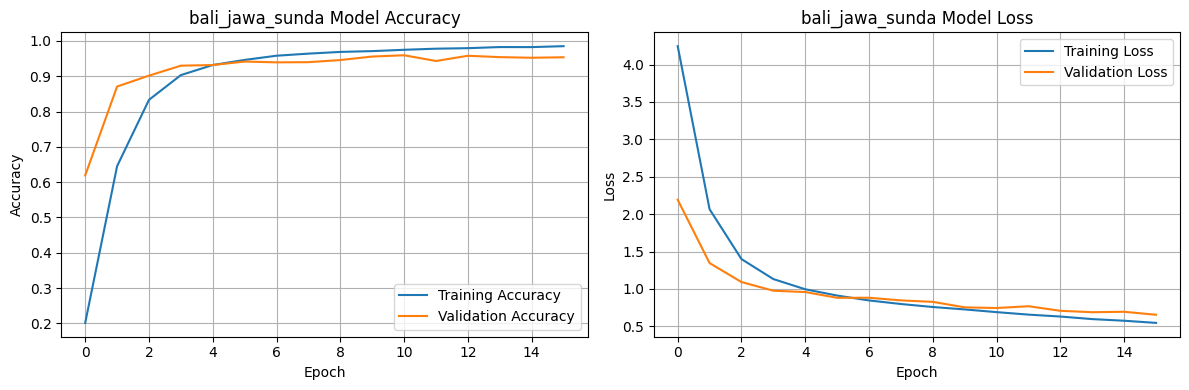

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 974ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━

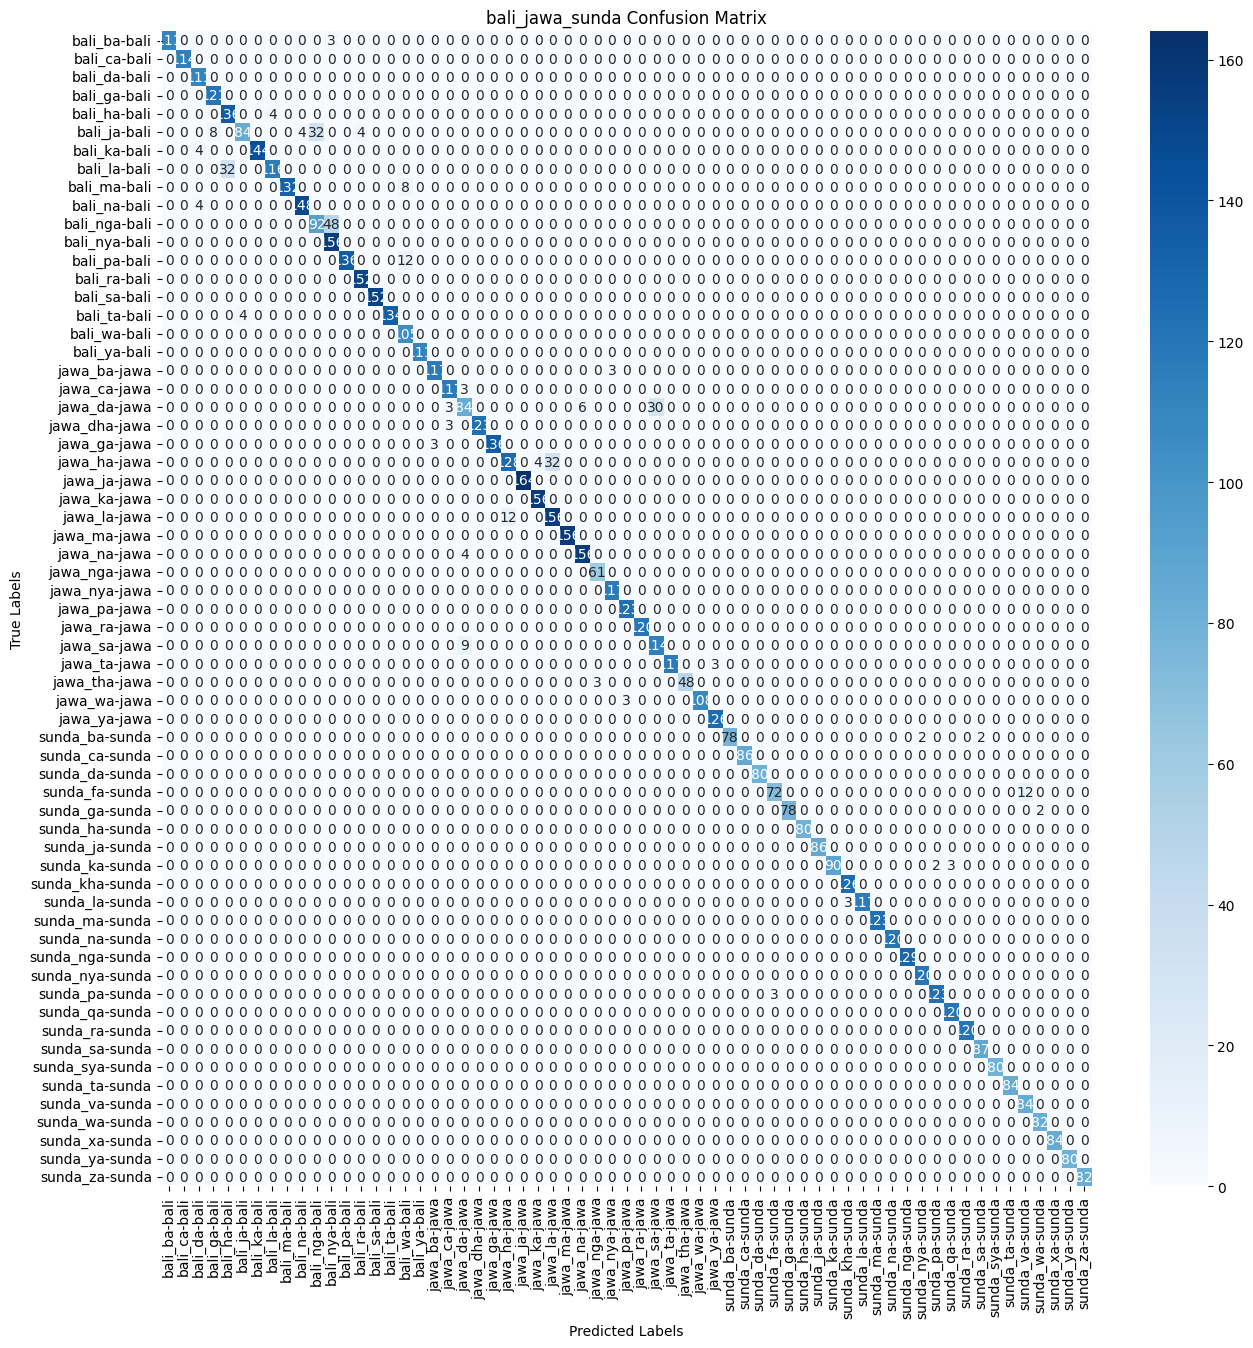

Training time: 5346.24 seconds

4. Generating summary report...

Model Comparison Summary:
             Model  Overall Accuracy (%)  Number of Classes  \
0             bali             91.641337                 18   
1             jawa             93.193717                 20   
2            sunda             98.443580                 25   
3        bali_jawa             93.424754                 38   
4       bali_sunda             95.520144                 43   
5       jawa_sunda             96.428571                 45   
6  bali_jawa_sunda             95.721997                 63   

   Training Time (s)  Bali Accuracy (%)  Jawa Accuracy (%)  Sunda Accuracy (%)  
0         793.749766                NaN                NaN                 NaN  
1         897.332186                NaN                NaN                 NaN  
2        1169.439477                NaN                NaN                 NaN  
3        2349.991769          93.150957          93.508426                 NaN  

In [ ]:
def compute_script_wise_accuracy(evaluation, model_name):
    """
    Computes script-wise accuracy for combined models

    Args:
        evaluation: Evaluation results dictionary
        model_name: Name of the model

    Returns:
        Dictionary with script-wise accuracies
    """
    script_accuracies = {}

    # Extract accuracies from the classification report
    report = evaluation['report']

    if 'bali_jawa_sunda' in model_name:
        # Calculate for three-script model
        bali_classes = [cls for cls in report.keys() if cls.startswith('bali_') and cls != 'accuracy']
        jawa_classes = [cls for cls in report.keys() if cls.startswith('jawa_') and cls != 'accuracy']
        sunda_classes = [cls for cls in report.keys() if cls.startswith('sunda_') and cls != 'accuracy']

        bali_accuracy = np.mean([report[cls]['f1-score'] for cls in bali_classes]) * 100
        jawa_accuracy = np.mean([report[cls]['f1-score'] for cls in jawa_classes]) * 100
        sunda_accuracy = np.mean([report[cls]['f1-score'] for cls in sunda_classes]) * 100

        script_accuracies['bali'] = bali_accuracy
        script_accuracies['jawa'] = jawa_accuracy
        script_accuracies['sunda'] = sunda_accuracy

    elif 'bali_jawa' in model_name:
        # Calculate for Bali+Jawa model
        bali_classes = [cls for cls in report.keys() if cls.startswith('bali_') and cls != 'accuracy']
        jawa_classes = [cls for cls in report.keys() if cls.startswith('jawa_') and cls != 'accuracy']

        bali_accuracy = np.mean([report[cls]['f1-score'] for cls in bali_classes]) * 100
        jawa_accuracy = np.mean([report[cls]['f1-score'] for cls in jawa_classes]) * 100

        script_accuracies['bali'] = bali_accuracy
        script_accuracies['jawa'] = jawa_accuracy

    elif 'bali_sunda' in model_name:
        # Calculate for Bali+Sunda model
        bali_classes = [cls for cls in report.keys() if cls.startswith('bali_') and cls != 'accuracy']
        sunda_classes = [cls for cls in report.keys() if cls.startswith('sunda_') and cls != 'accuracy']

        bali_accuracy = np.mean([report[cls]['f1-score'] for cls in bali_classes]) * 100
        sunda_accuracy = np.mean([report[cls]['f1-score'] for cls in sunda_classes]) * 100

        script_accuracies['bali'] = bali_accuracy
        script_accuracies['sunda'] = sunda_accuracy

    elif 'jawa_sunda' in model_name:
        # Calculate for Jawa+Sunda model
        jawa_classes = [cls for cls in report.keys() if cls.startswith('jawa_') and cls != 'accuracy']
        sunda_classes = [cls for cls in report.keys() if cls.startswith('sunda_') and cls != 'accuracy']

        jawa_accuracy = np.mean([report[cls]['f1-score'] for cls in jawa_classes]) * 100
        sunda_accuracy = np.mean([report[cls]['f1-score'] for cls in sunda_classes]) * 100

        script_accuracies['jawa'] = jawa_accuracy
        script_accuracies['sunda'] = sunda_accuracy

    return script_accuracies

def generate_summary_report():
    """
    Generates a summary report of all model results

    Returns:
        Pandas DataFrame with all results
    """
    # Extract relevant metrics for each model
    summary_data = []

    for result in results_summary:
        model_name = result['model_name']
        accuracy = result['accuracy']
        training_time = result['training_time']
        num_classes = result['num_classes']

        # Get script-wise accuracies if applicable
        script_accuracies = compute_script_wise_accuracy(result, model_name)

        # Combine data
        model_data = {
            'Model': model_name,
            'Overall Accuracy (%)': accuracy,
            'Number of Classes': num_classes,
            'Training Time (s)': training_time
        }

        # Add script-wise accuracies if available
        for script, acc in script_accuracies.items():
            model_data[f'{script.capitalize()} Accuracy (%)'] = acc

        summary_data.append(model_data)

    # Create DataFrame
    df = pd.DataFrame(summary_data)

    # Save to CSV
    df.to_csv('results/model_comparison_summary.csv', index=False)

    return df

def main():
    """
    Main function to run all training processes
    """
    print("Starting Indonesian Script Classification Model Training")
    print("======================================================")

    # Extract datasets
    extract_datasets()

    # Train individual models
    print("\n1. Training individual script models...")
    bali_model, bali_classes, _ = train_single_script_model('bali', bali_path)
    jawa_model, jawa_classes, _ = train_single_script_model('jawa', jawa_path)
    sunda_model, sunda_classes, _ = train_single_script_model('sunda', sunda_path)

    # Train combined models (two scripts)
    print("\n2. Training combined two-script models...")
    bali_jawa_model, _, _ = train_combined_model(
        'bali', bali_path, bali_classes,
        'jawa', jawa_path, jawa_classes
    )

    bali_sunda_model, _, _ = train_combined_model(
        'bali', bali_path, bali_classes,
        'sunda', sunda_path, sunda_classes
    )

    jawa_sunda_model, _, _ = train_combined_model(
        'jawa', jawa_path, jawa_classes,
        'sunda', sunda_path, sunda_classes
    )

    # Train the three-script combined model
    print("\n3. Training the combined three-script model...")
    three_script_model, _, _ = train_three_script_model()

    # Generate and display summary report
    print("\n4. Generating summary report...")
    summary_df = generate_summary_report()

    print("\nModel Comparison Summary:")
    print(summary_df)

    print("\nTraining complete. All models and results saved.")
    print("Check the 'models' directory for model files and 'results' directory for evaluation metrics.")

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Run the main training process
    main()